1. Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [4]:
data.shape

(91713, 85)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
data.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [7]:
data.drop(["encounter_id" ,"patient_id" ,"hospital_id","Unnamed: 83", ],axis =1, inplace=True)

In [10]:
Num=[]
for col in data.columns:
    if (data[col].dtype==int)or (data[col].dtype==float):
        Num.append(col)

In [11]:
for col in data.columns:
    
    if col in Num :
        
        data[col].fillna(data[col].median(), inplace=True)

In [12]:
categorical=[]
for col in data.columns:
    if  (data[col].dtype==object):
        categorical.append(col)

In [13]:
for col in data.columns:
    if col in categorical:
        data[col].fillna(data[col].mode(), inplace=True)

In [14]:
data["ethnicity"].mode()

0    Caucasian
Name: ethnicity, dtype: object

In [15]:
data.describe()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.433548,29.128570,0.183736,169.648256,508.357692,0.835766,83.917765,184.252789,556.425298,0.201106,...,0.041879,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477,0.086302
std,16.393595,8.124165,0.387271,10.716719,228.989661,2.487756,24.645926,85.686007,460.764423,0.400829,...,0.207821,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626,0.280811
min,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.787760,0.000000,162.560000,369.000000,0.035417,67.300000,113.000000,203.010000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,122.000000,409.020000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.653061,0.000000,177.800000,679.000000,0.409028,96.300000,301.000000,703.030000,0.000000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,308.000000,2201.050000,1.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data.isna().sum()

age                               0
bmi                               0
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 81, dtype: int64

In [17]:
data.drop("hospital_death",axis=1)
y=data["hospital_death"]

In [19]:
from tensorflow import keras

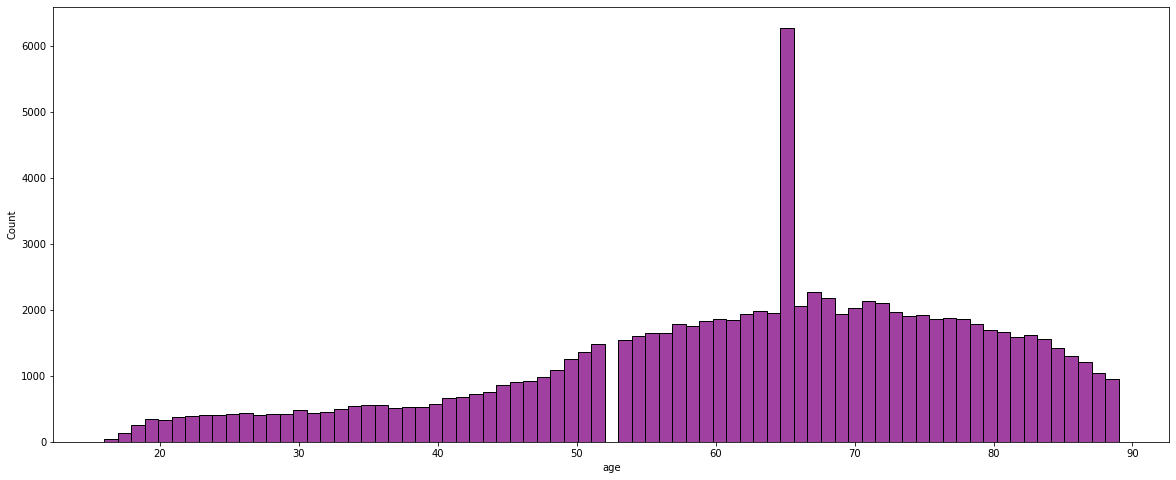

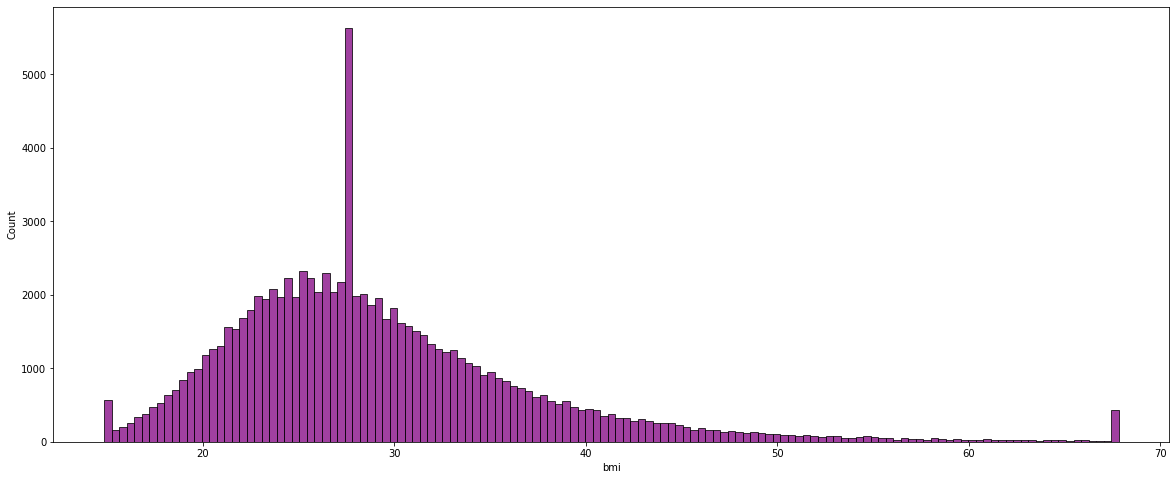

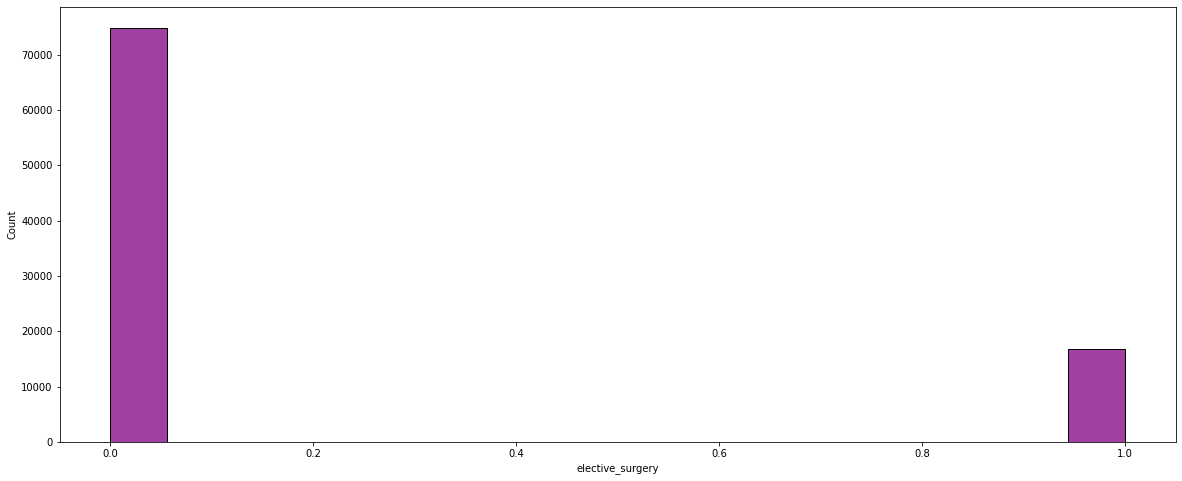

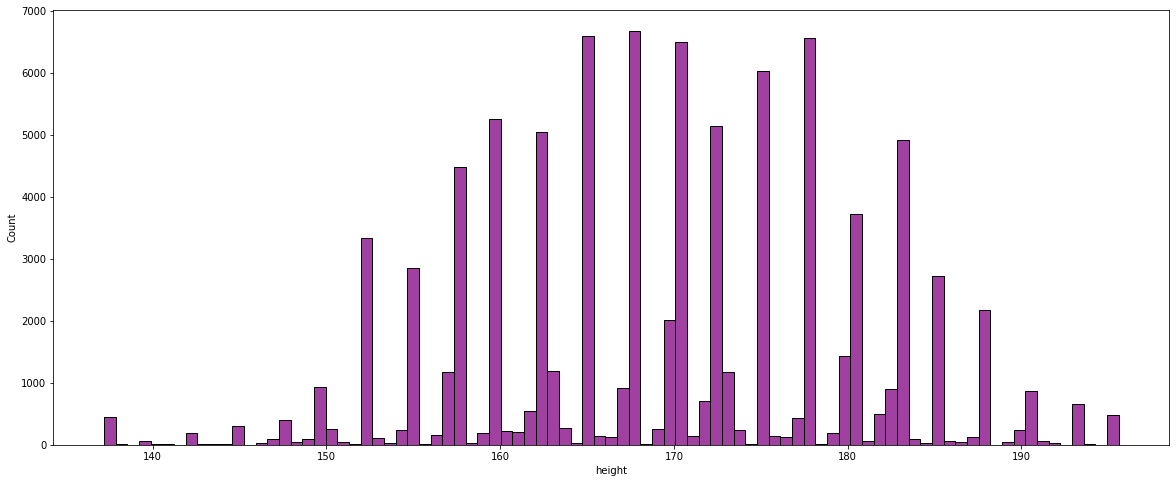

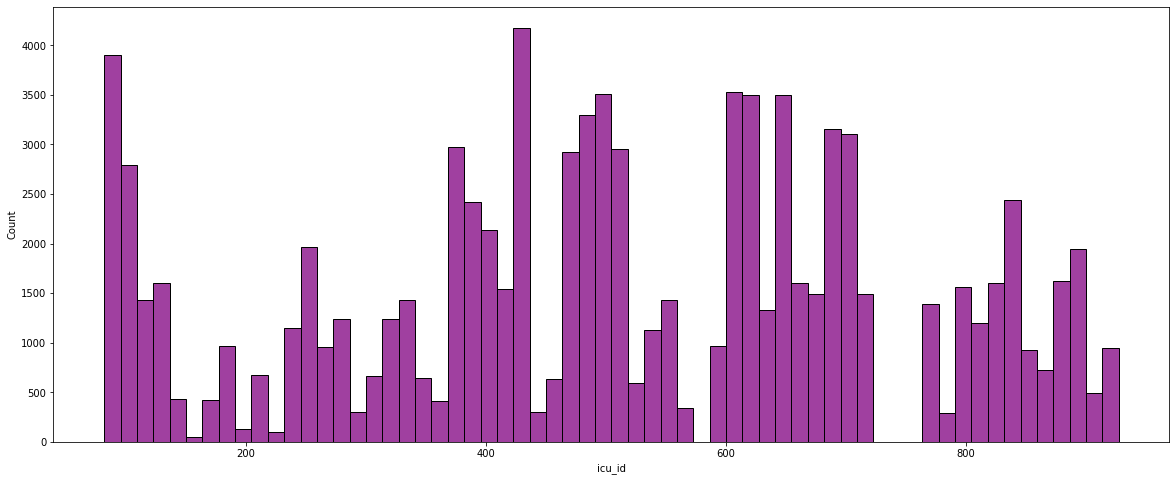

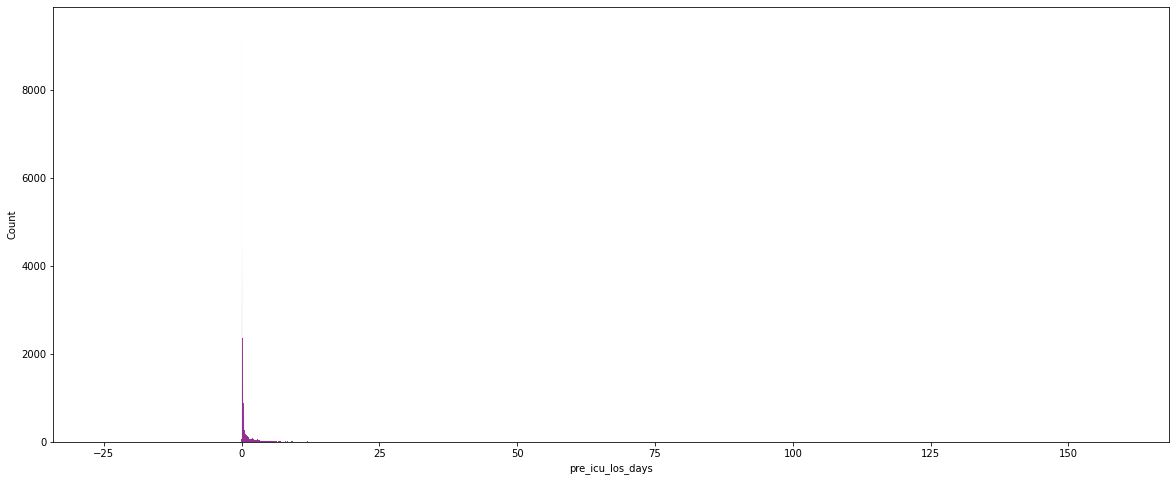

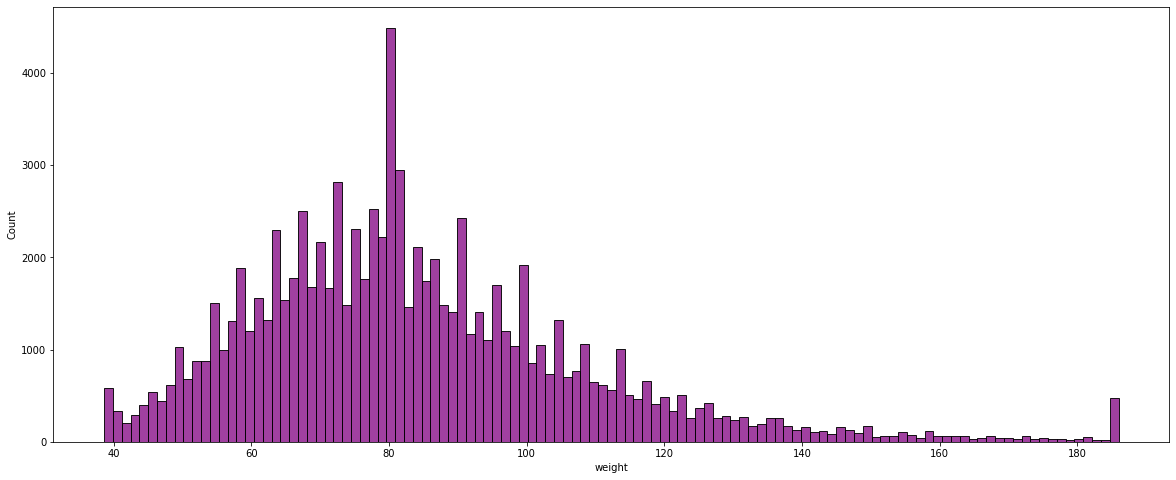

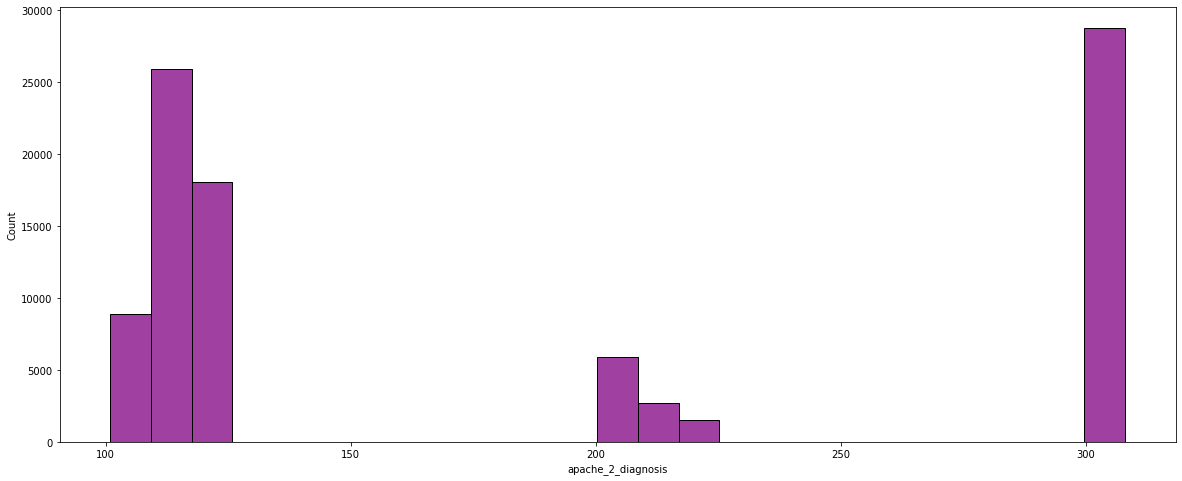

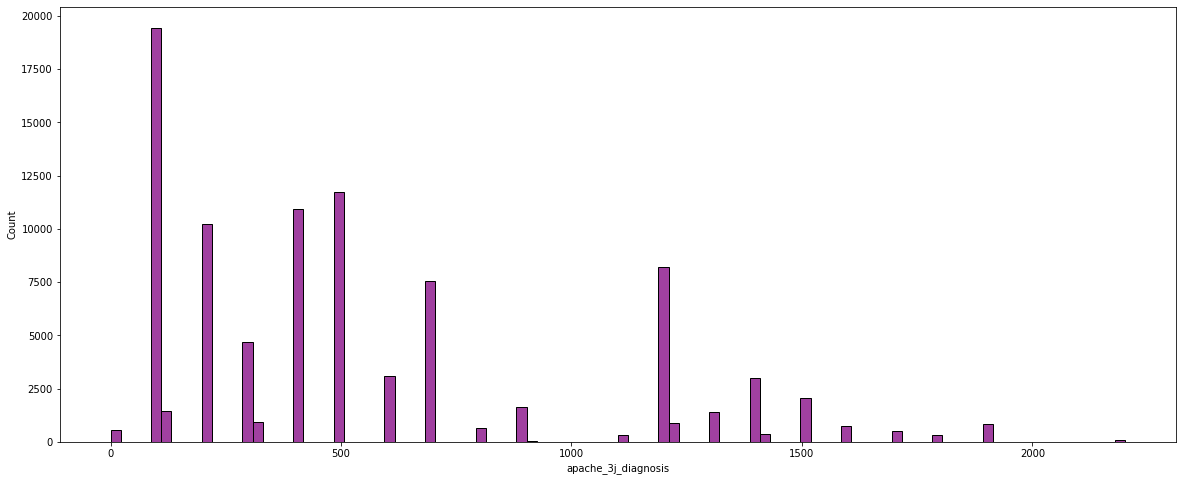

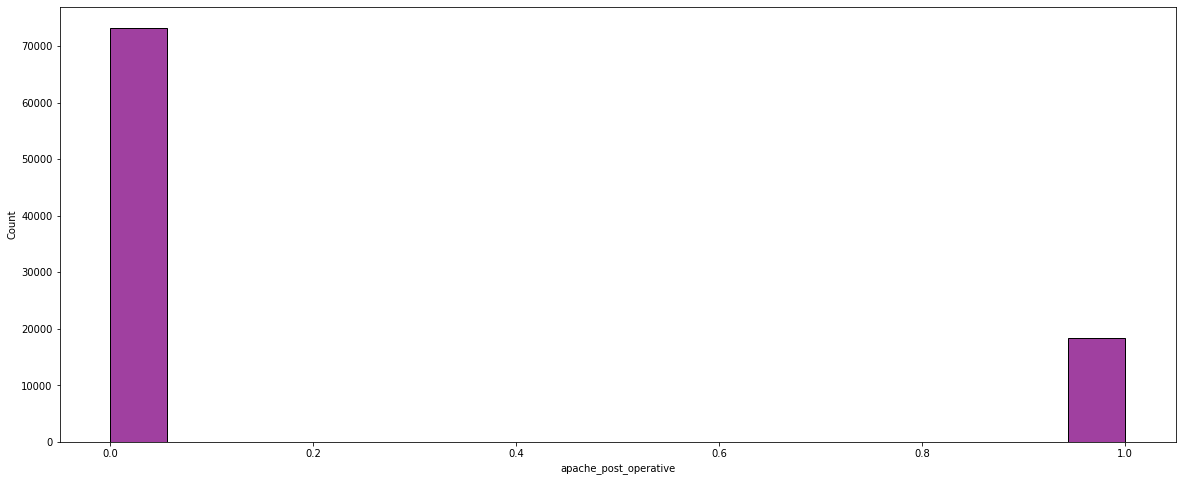

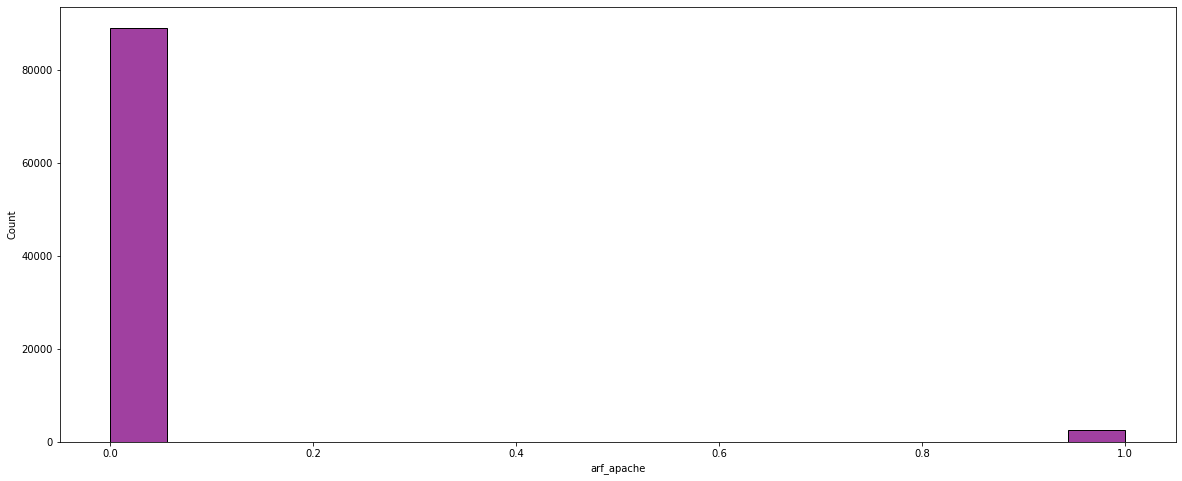

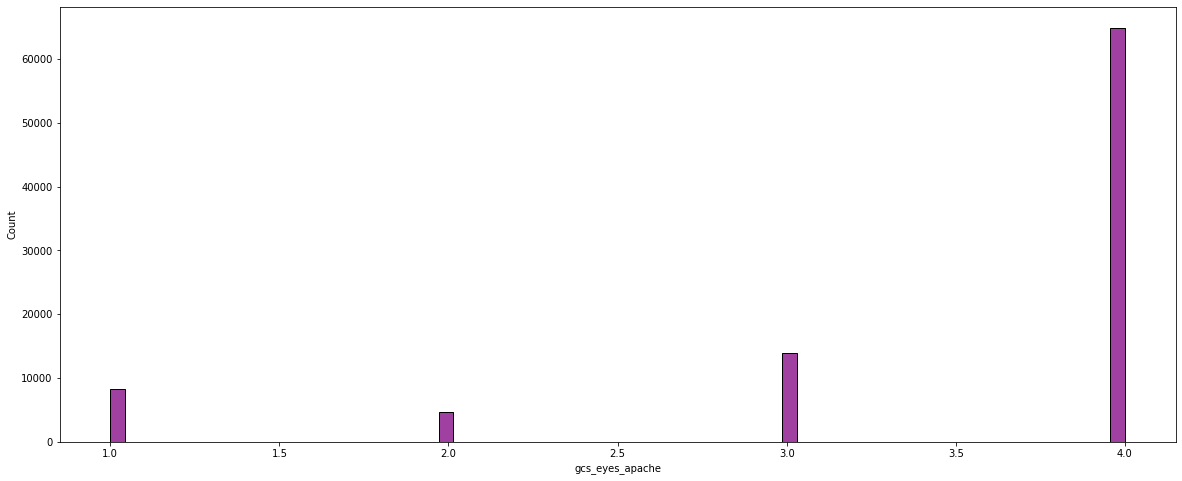

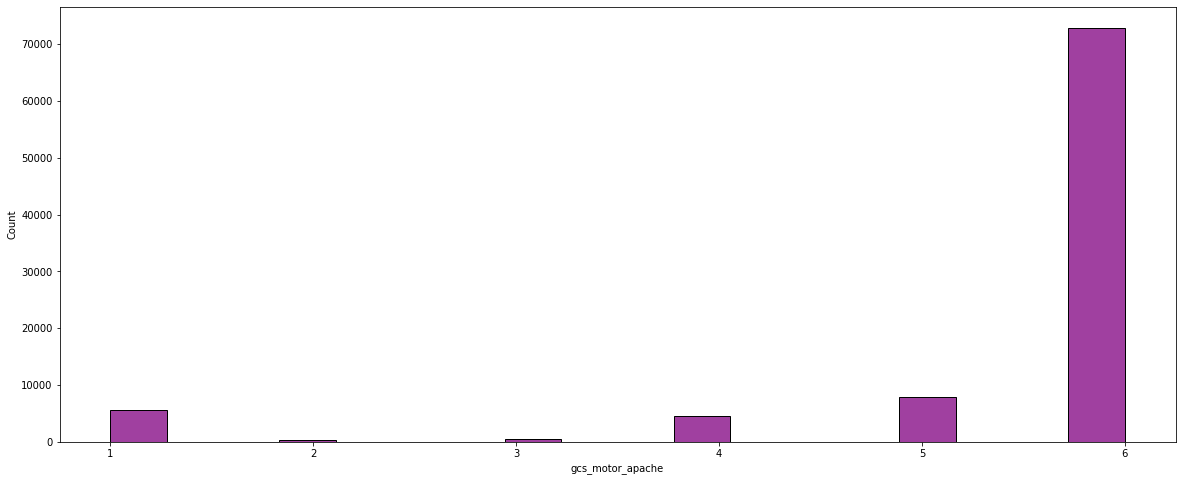

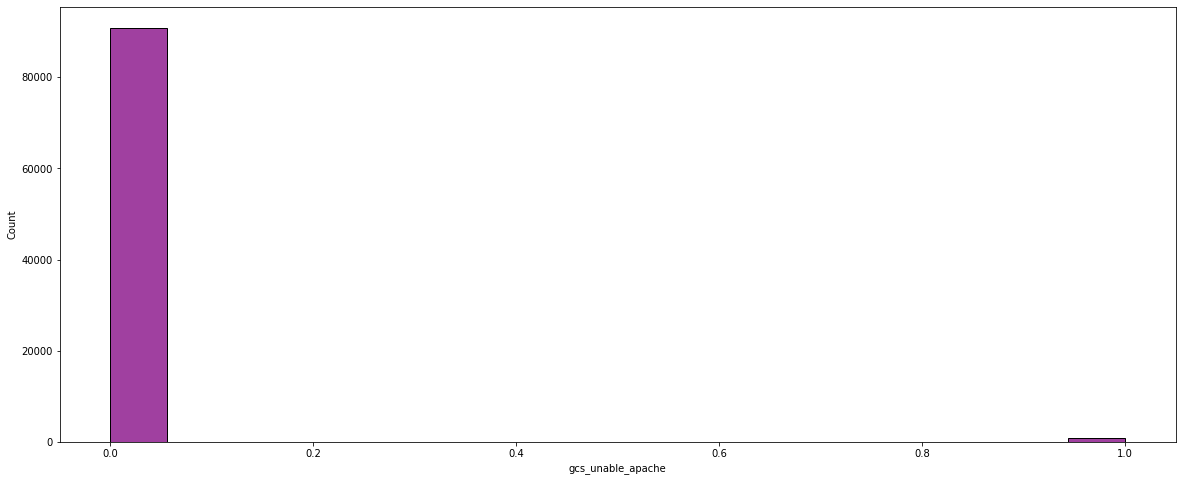

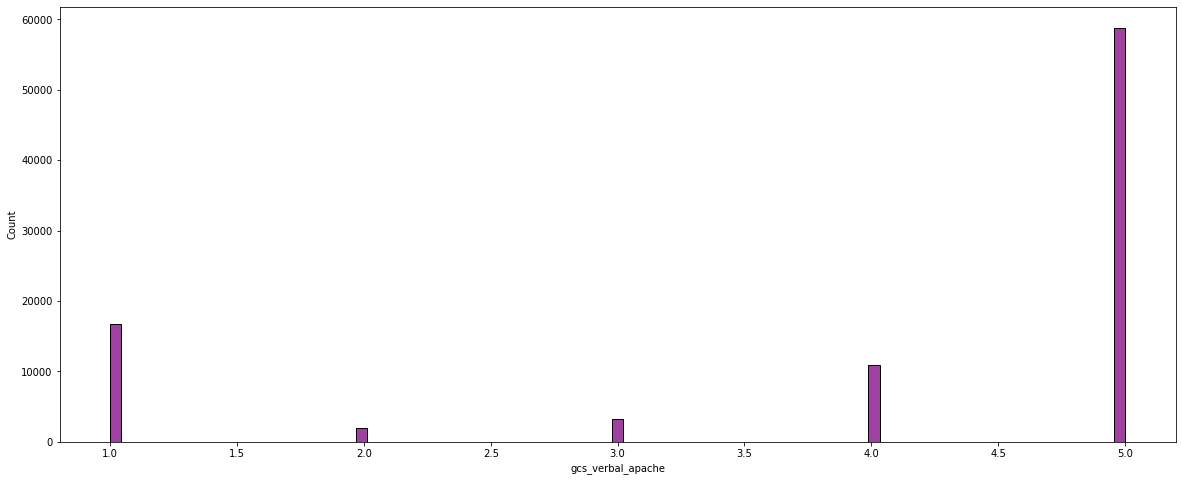

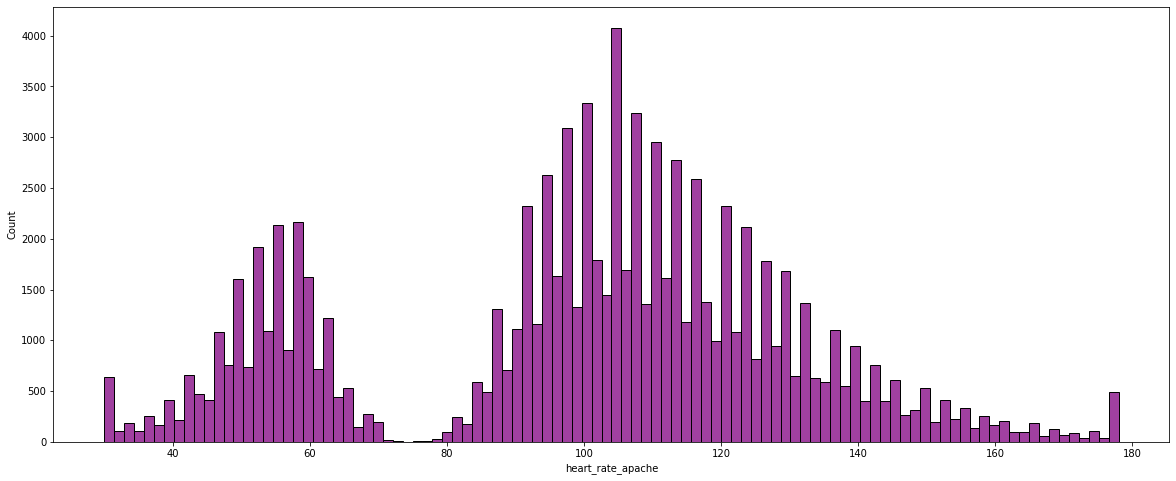

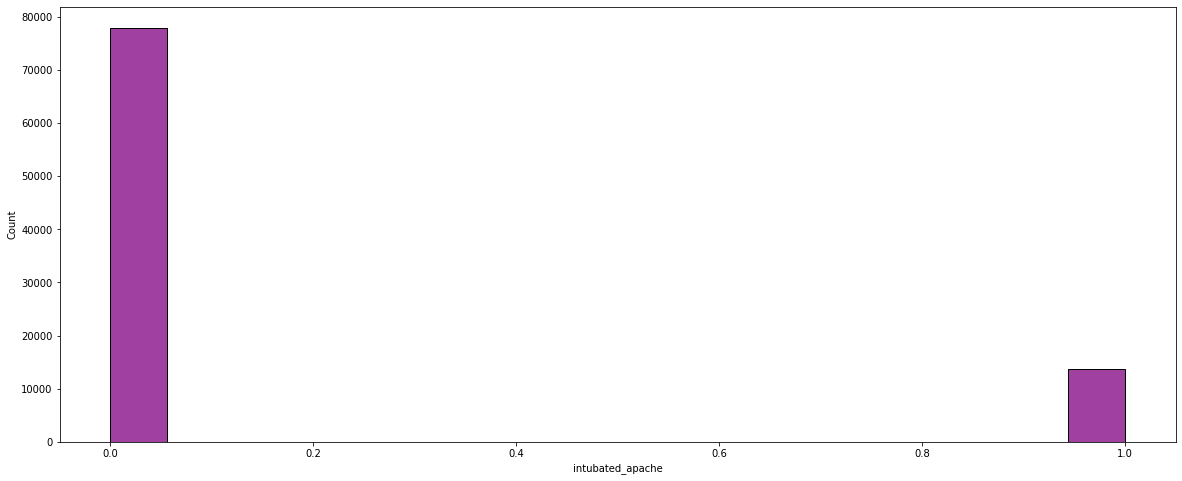

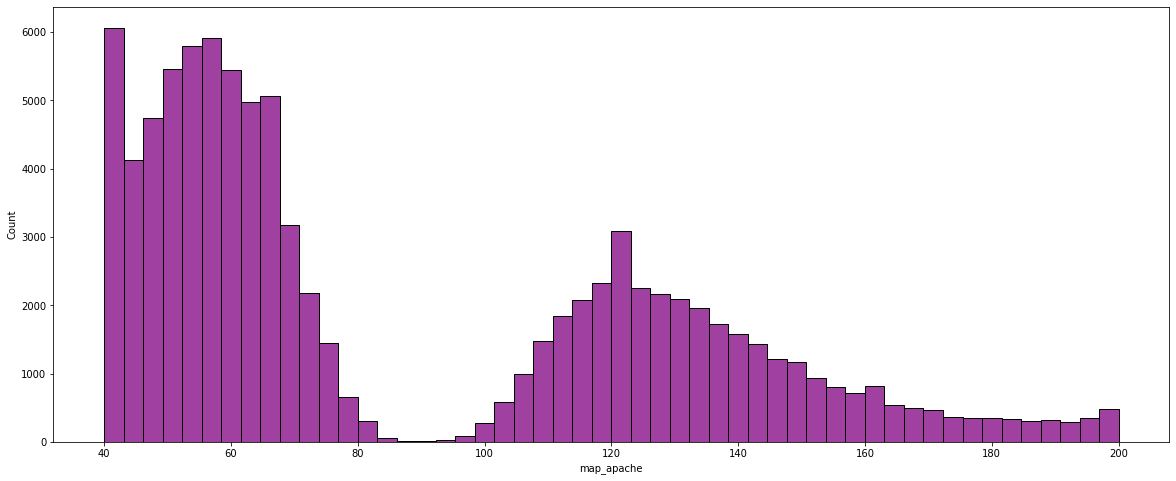

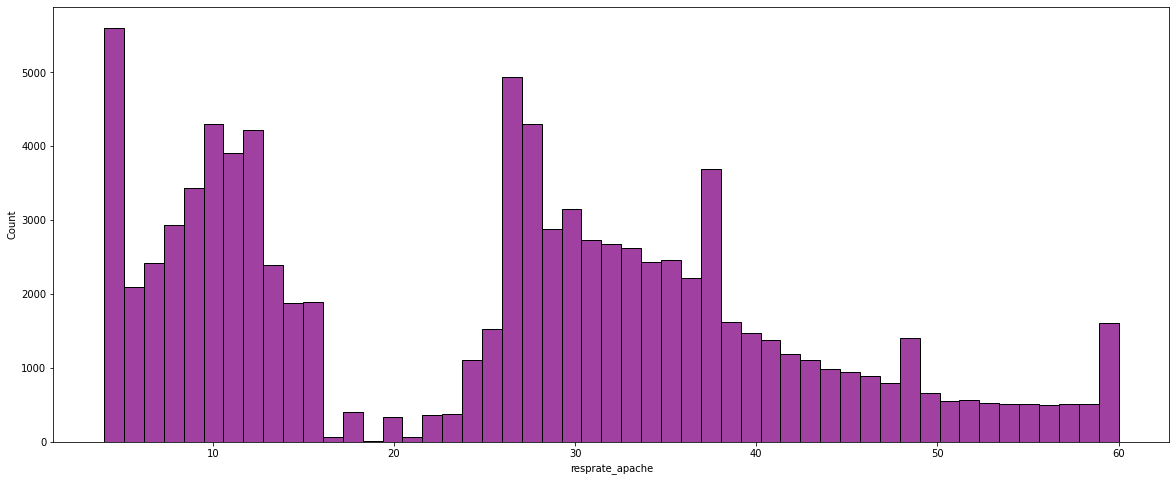

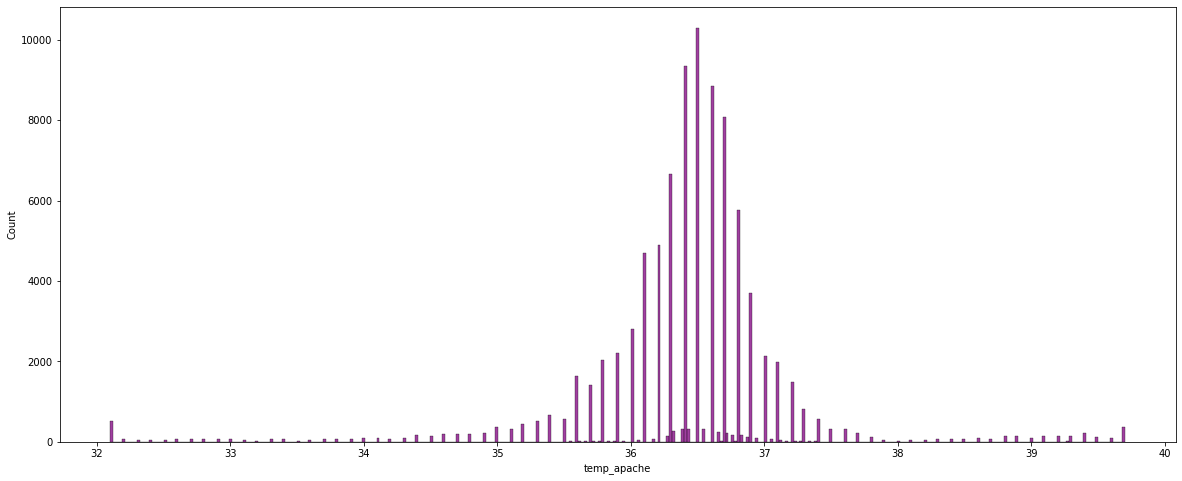

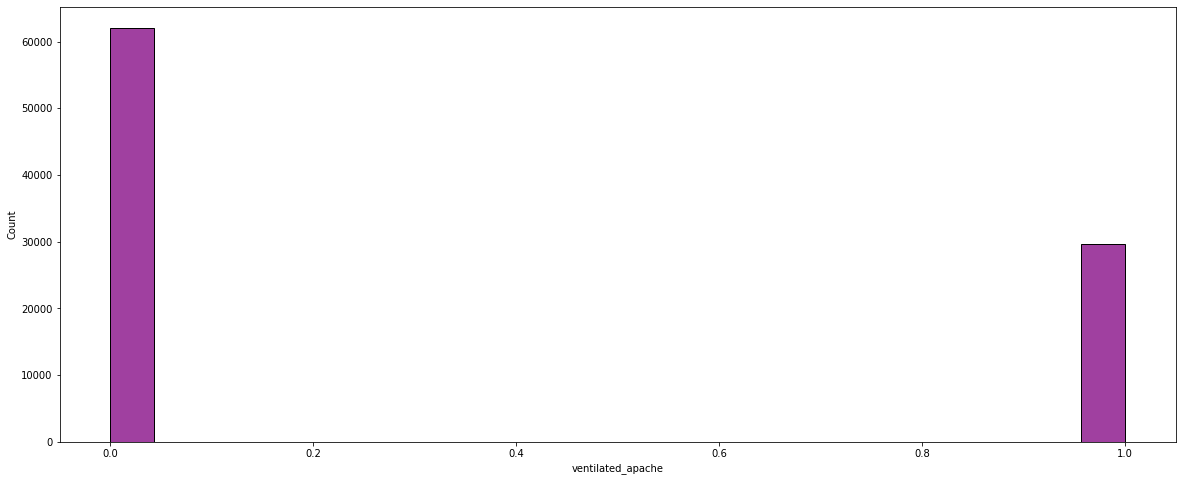

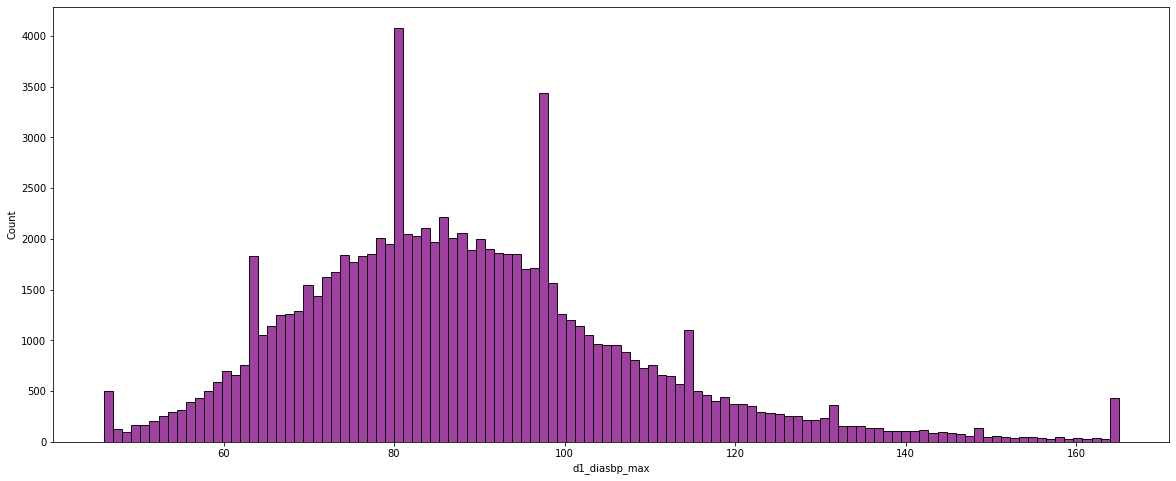

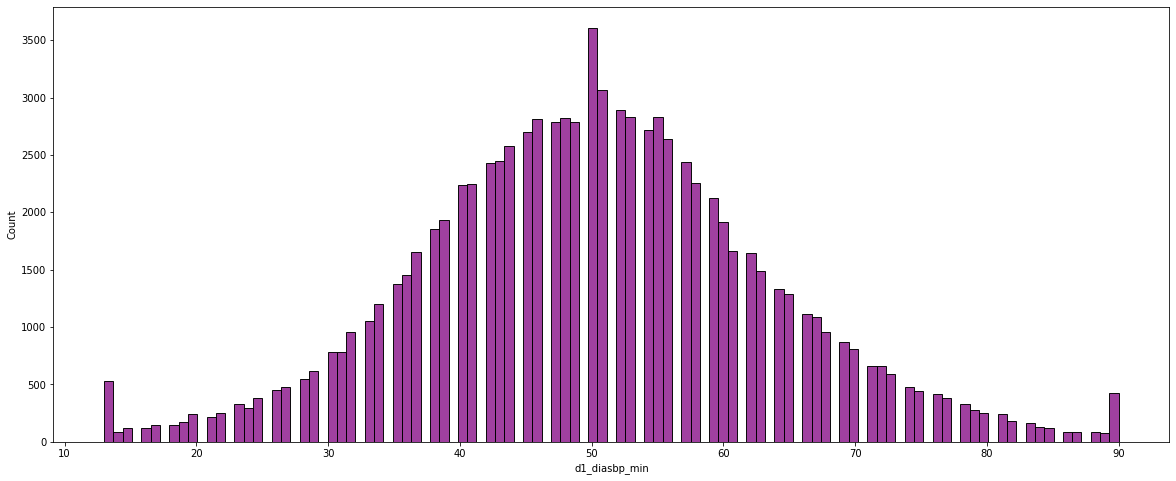

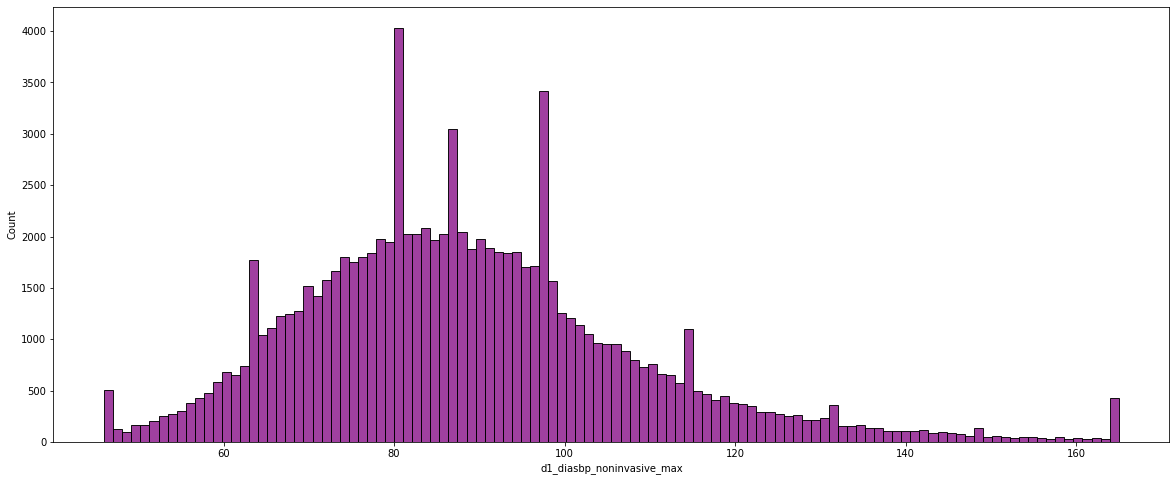

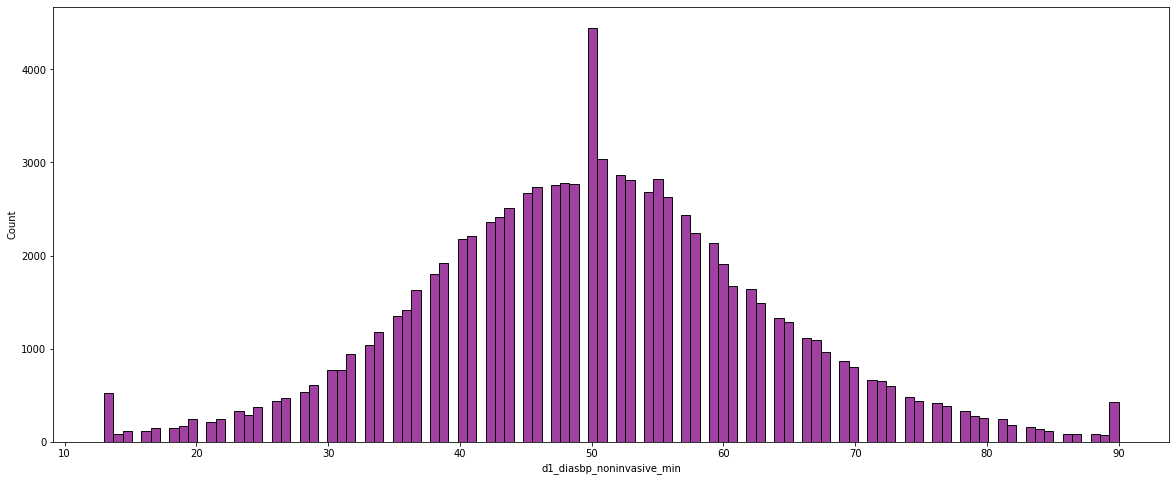

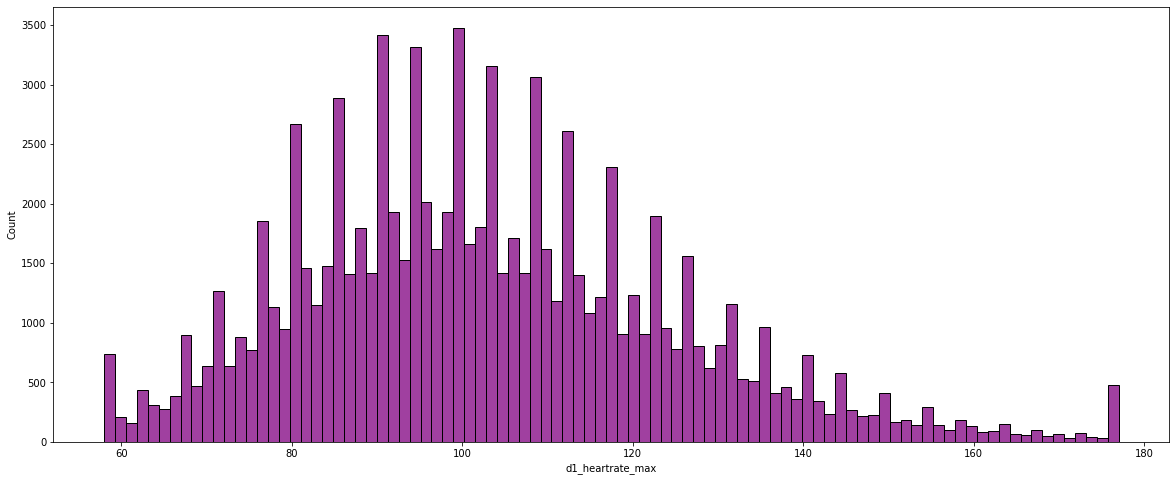

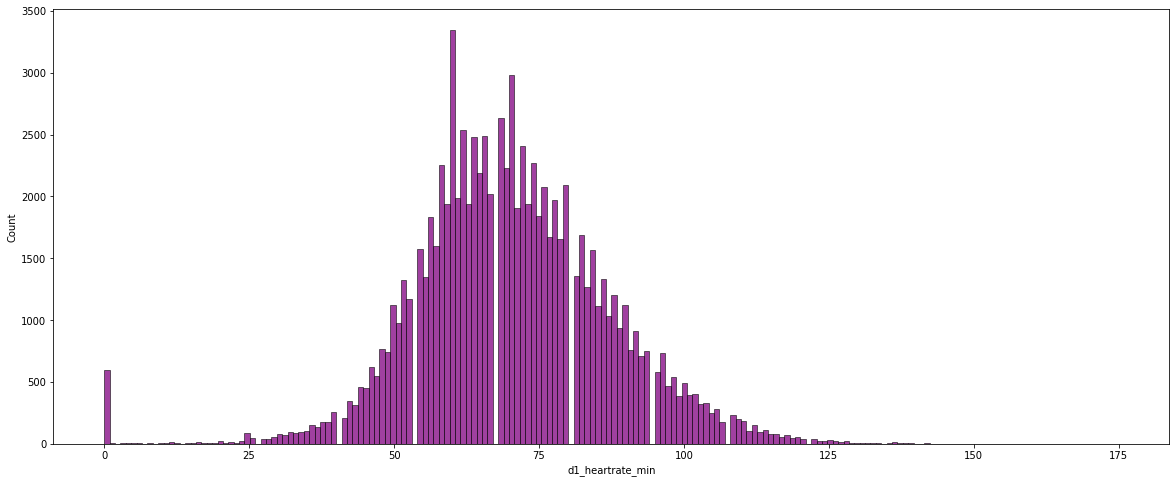

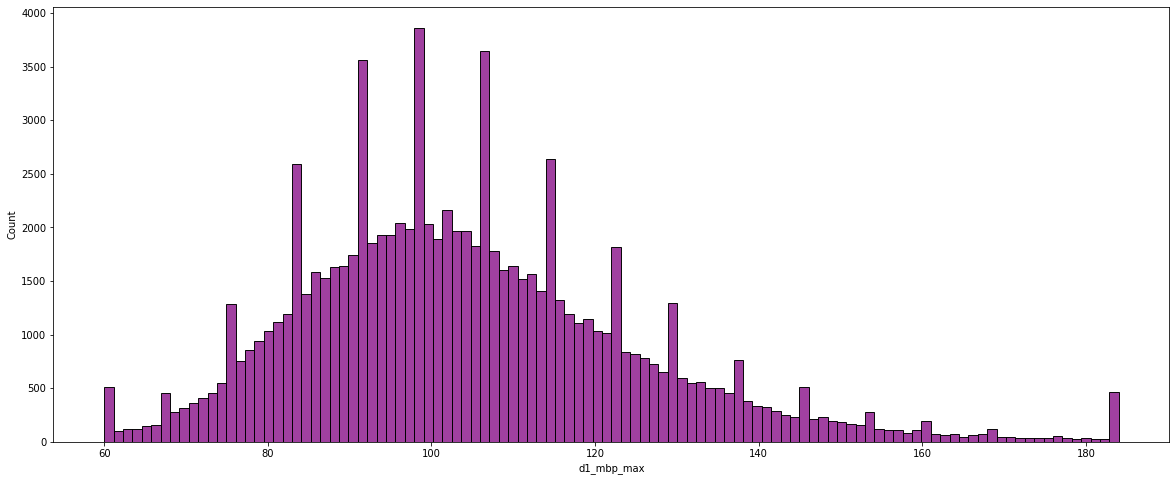

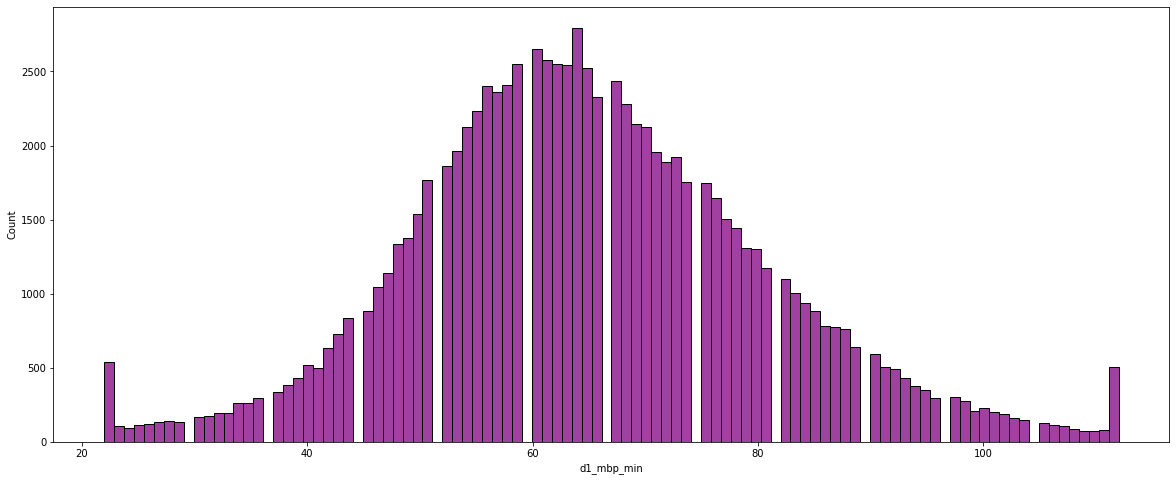

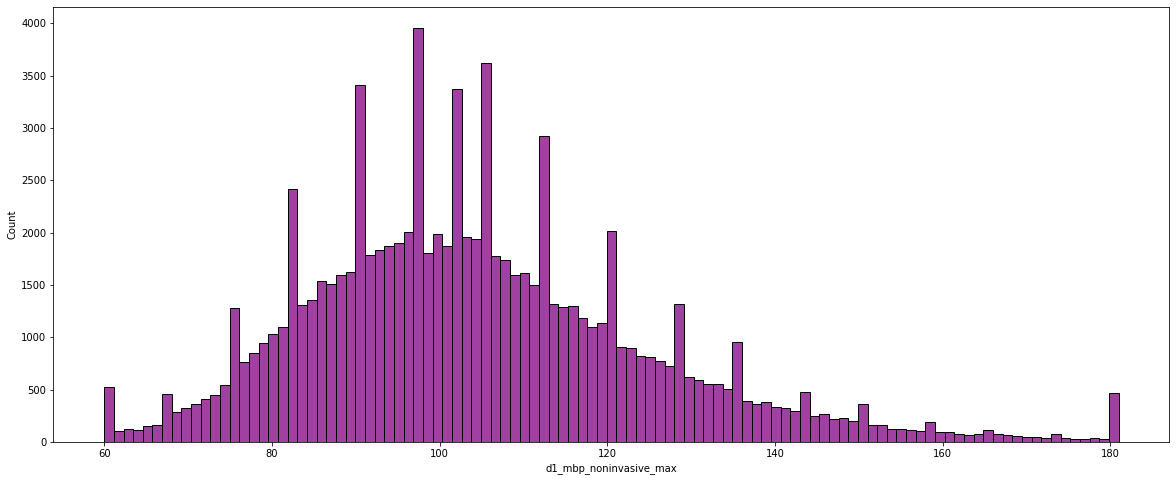

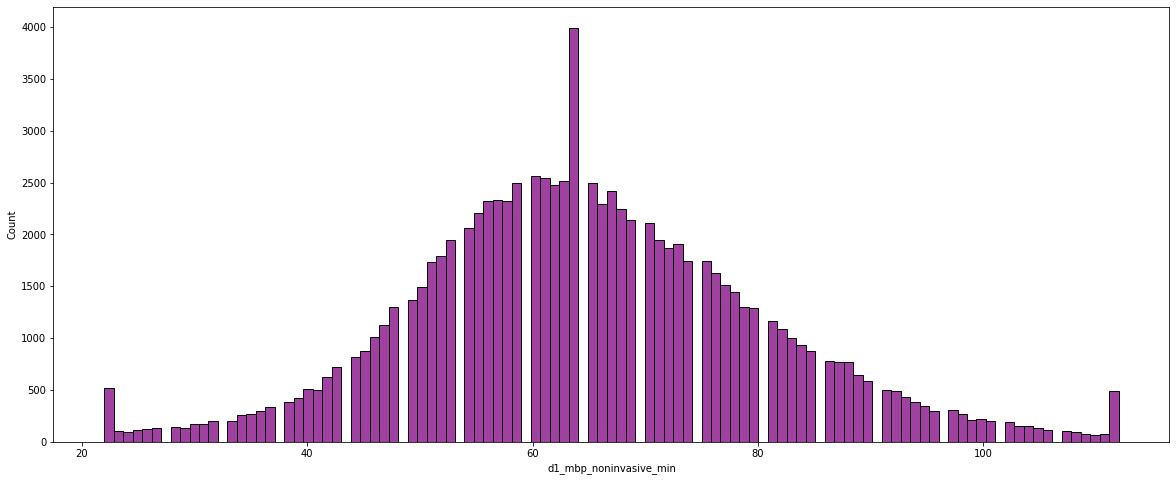

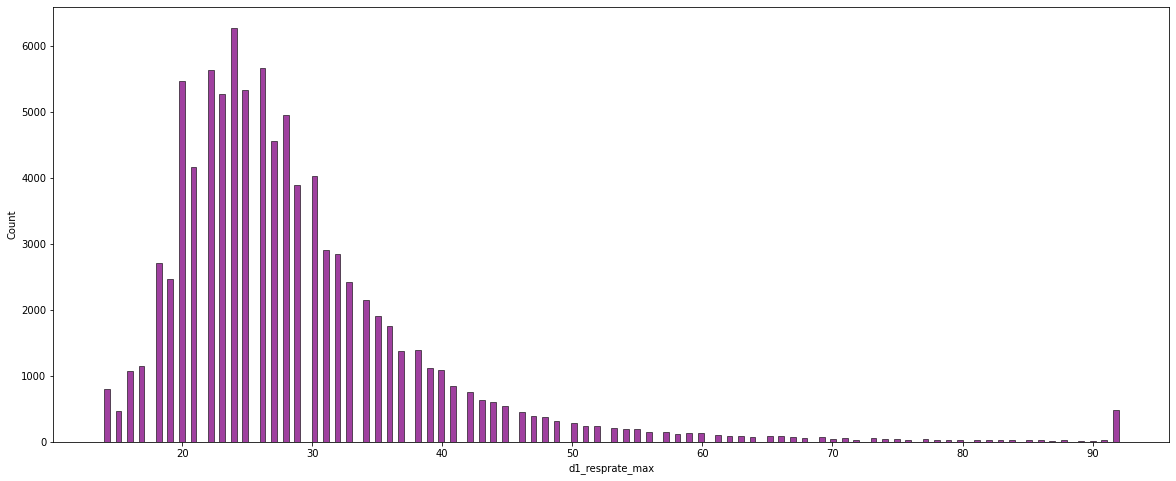

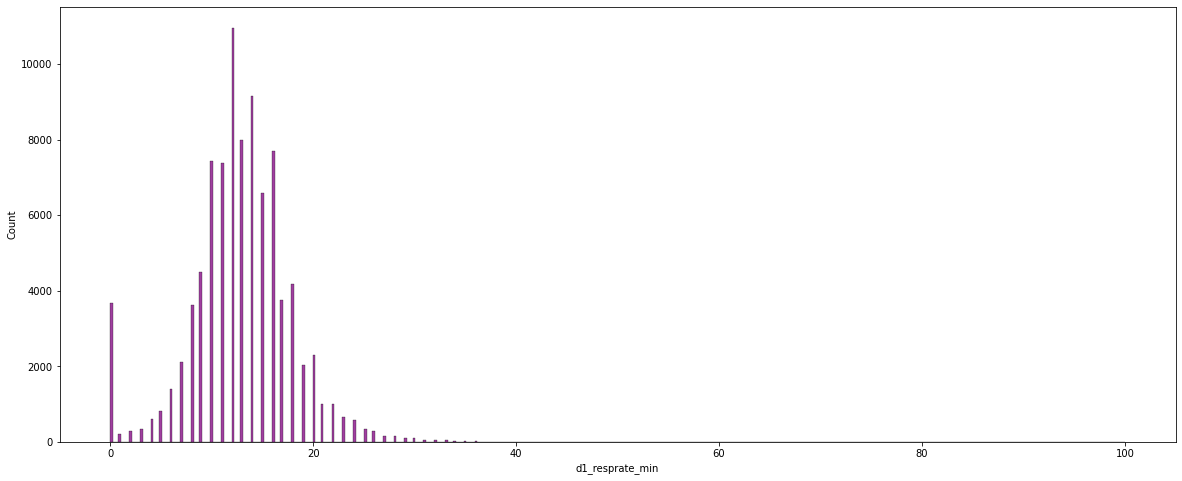

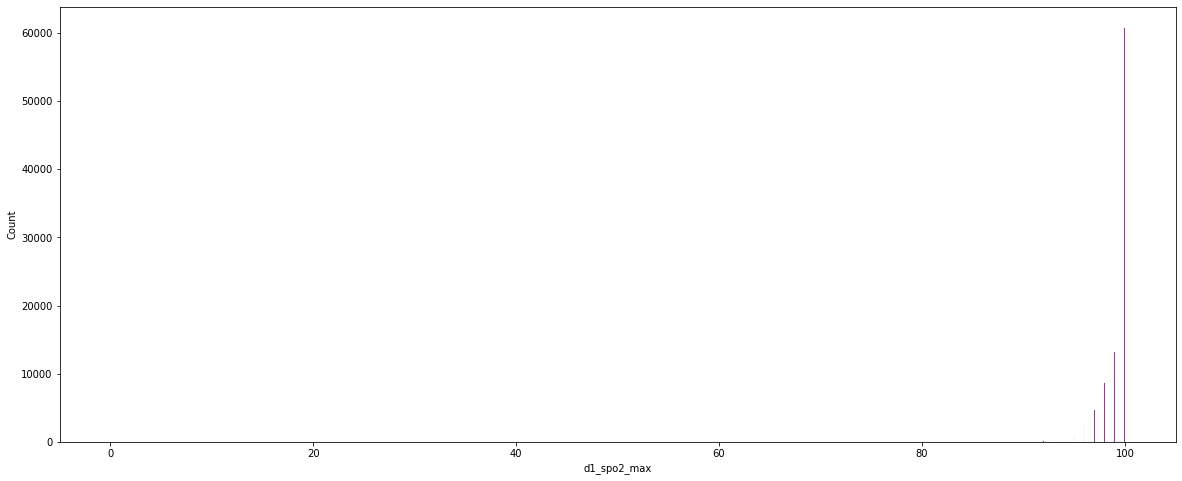

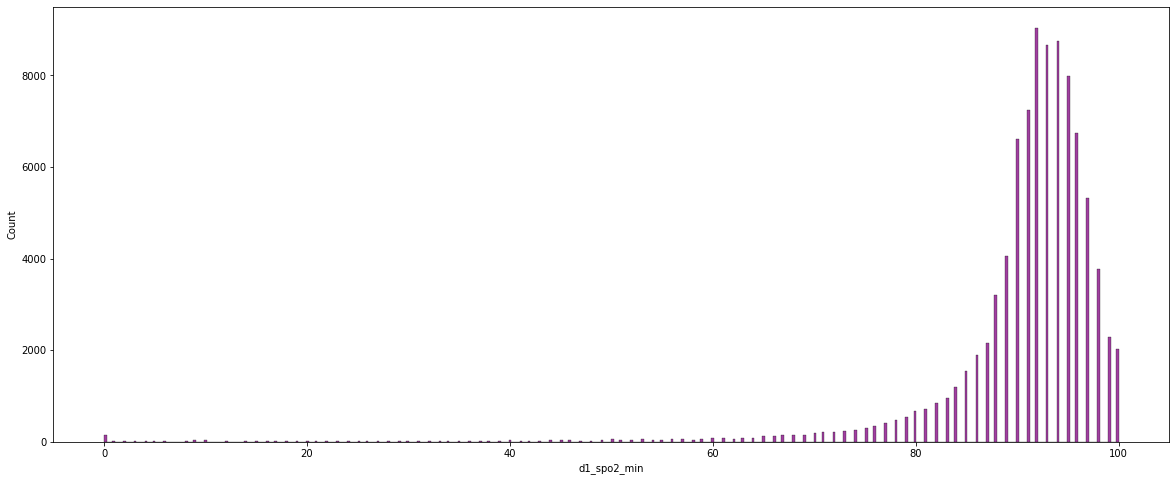

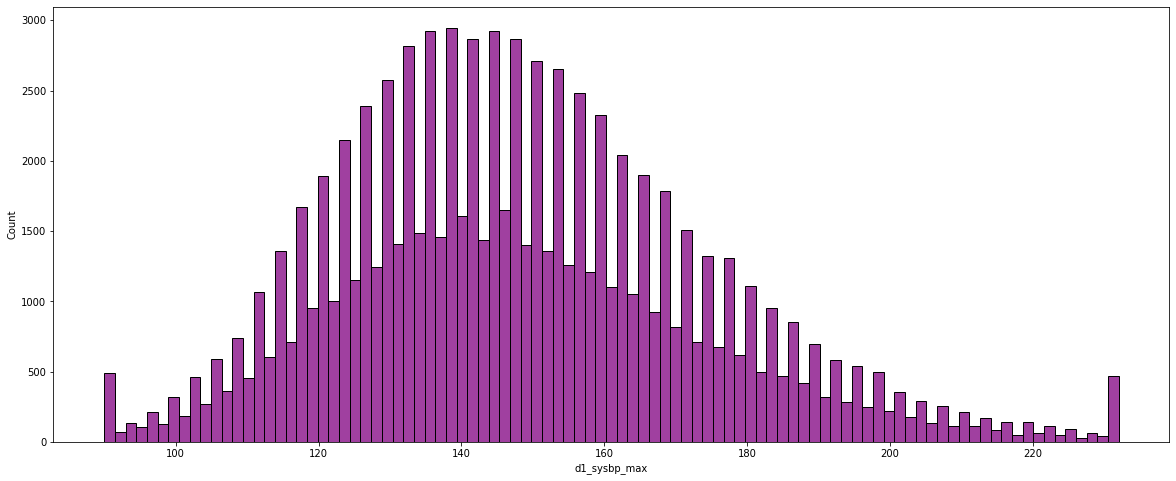

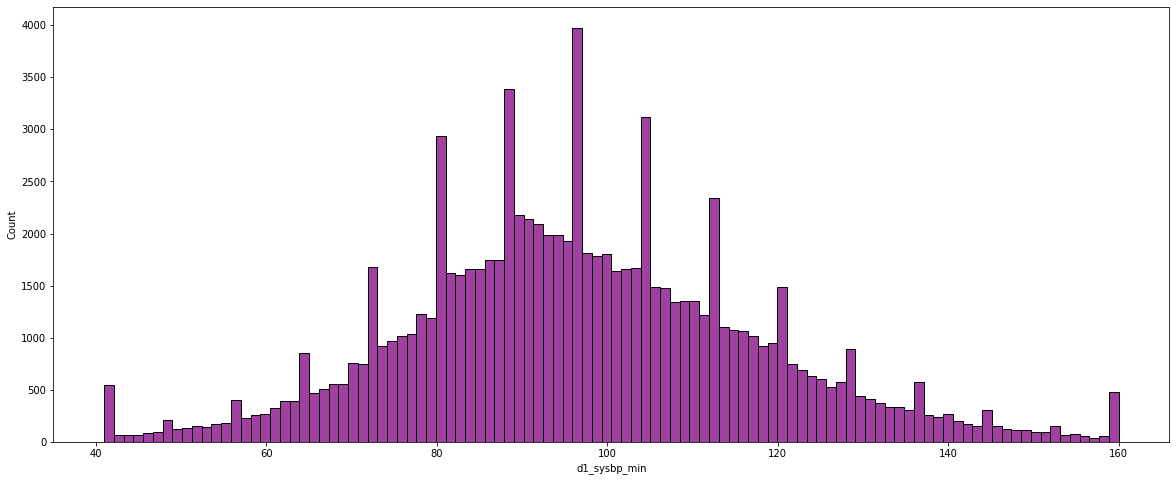

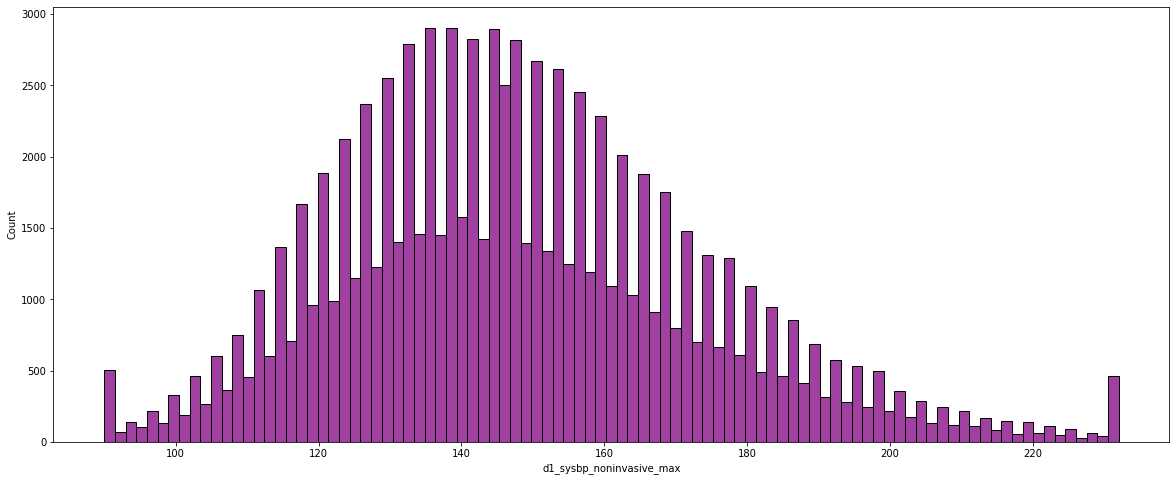

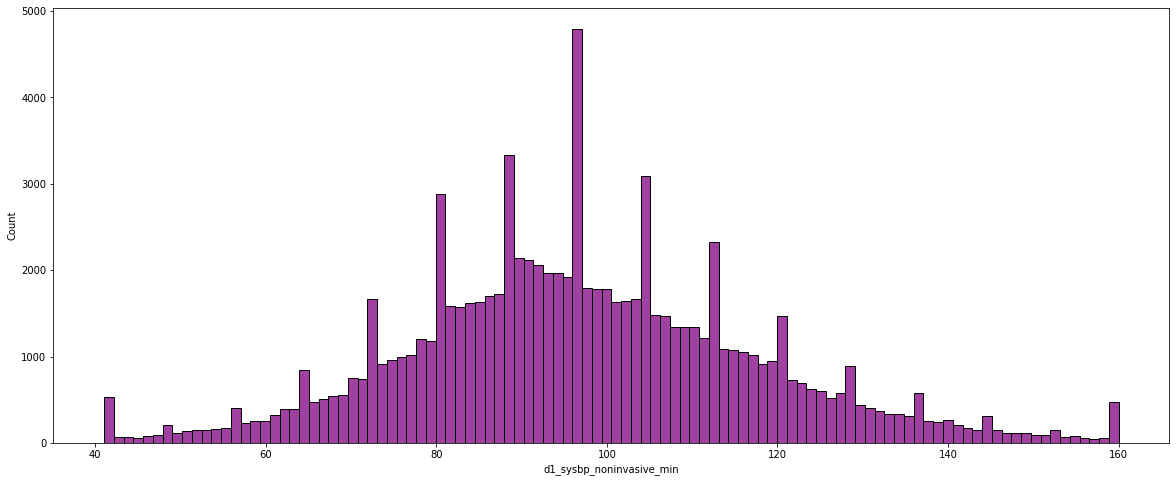

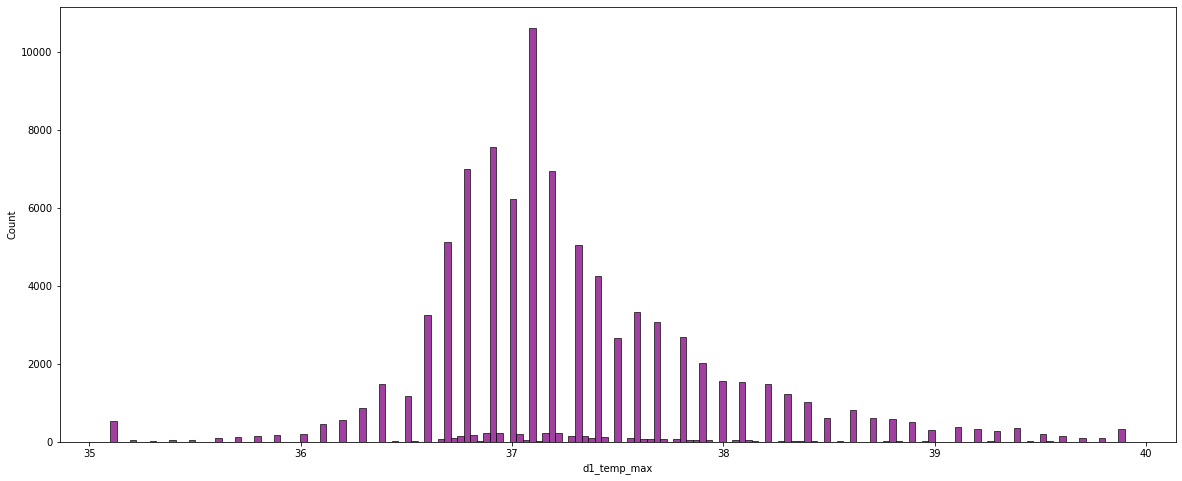

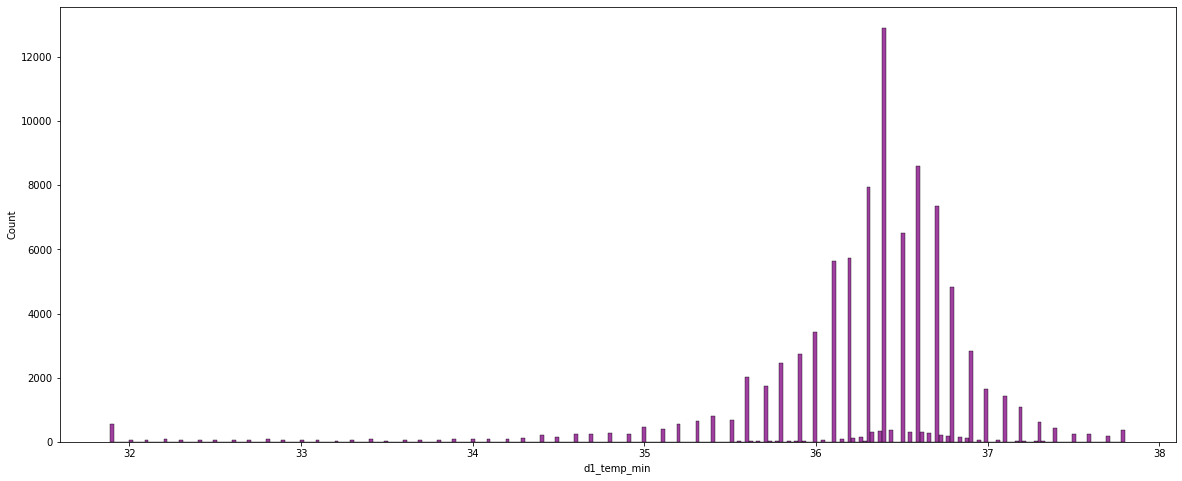

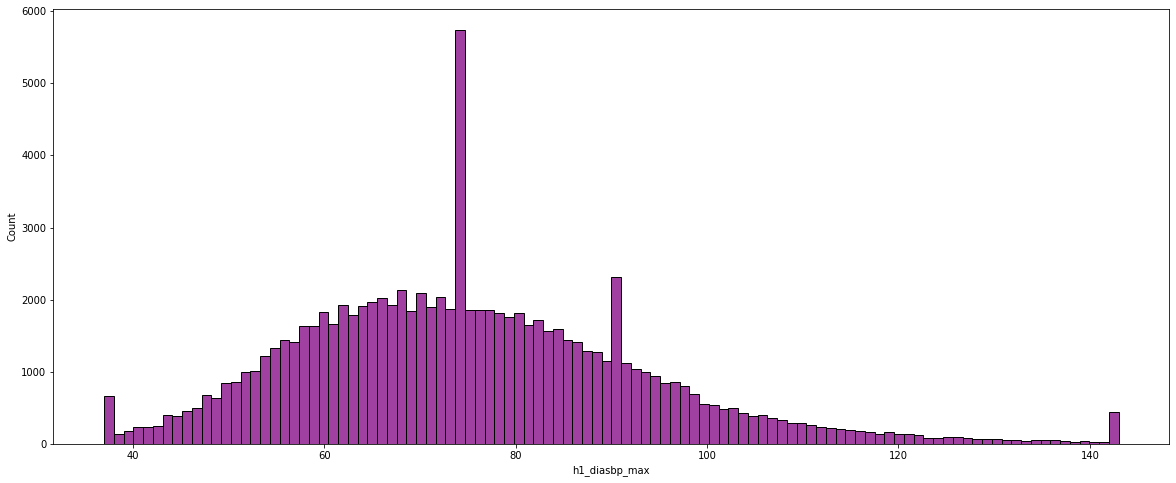

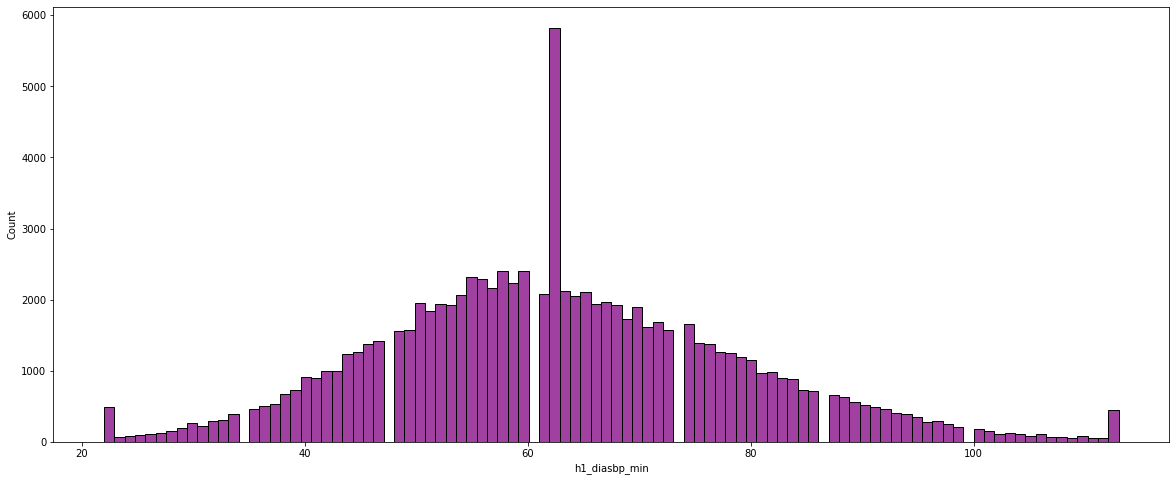

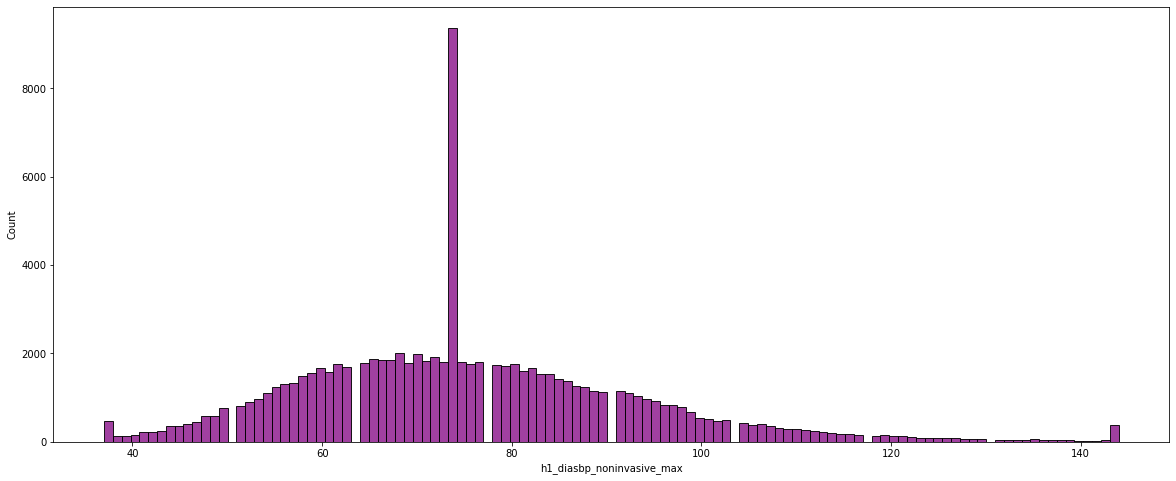

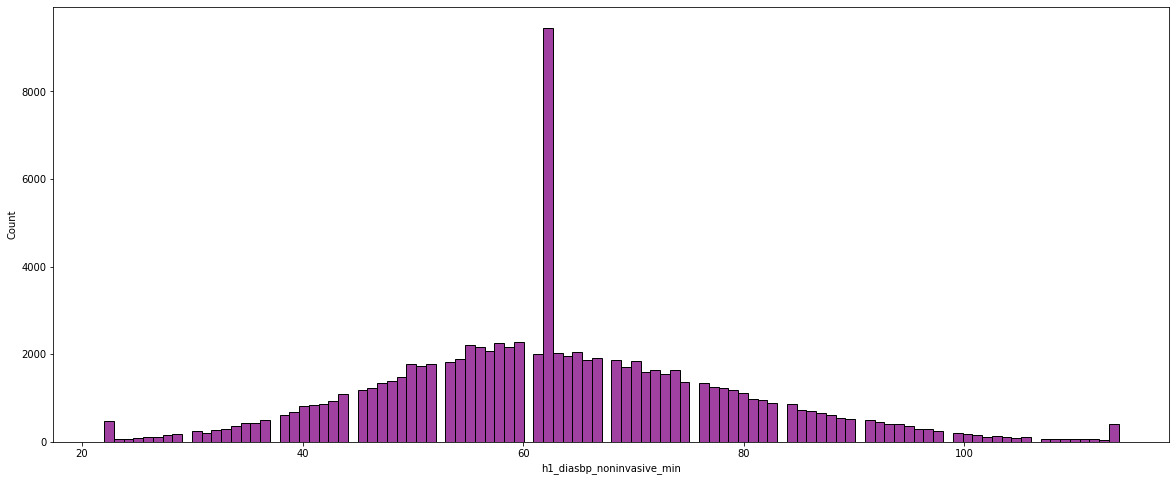

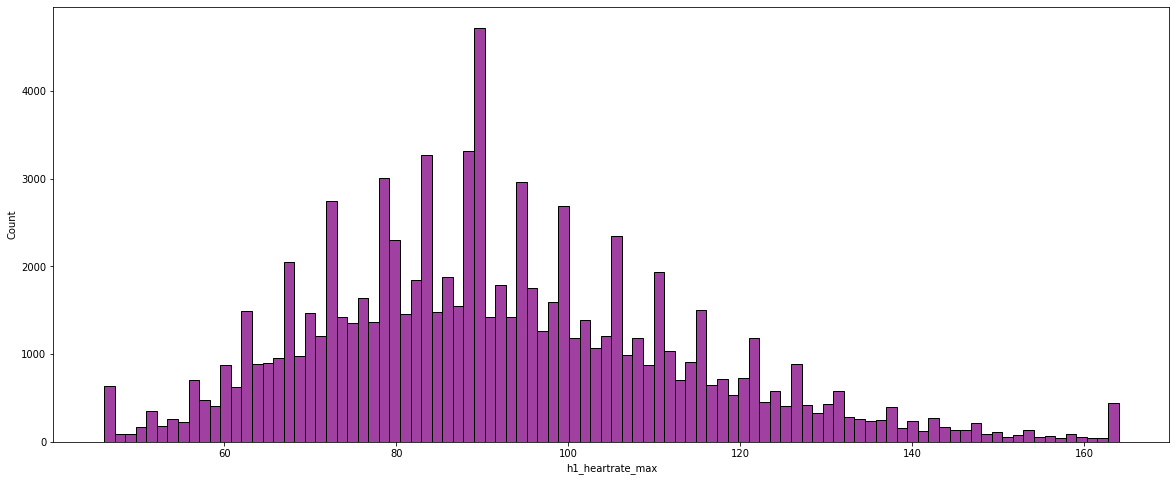

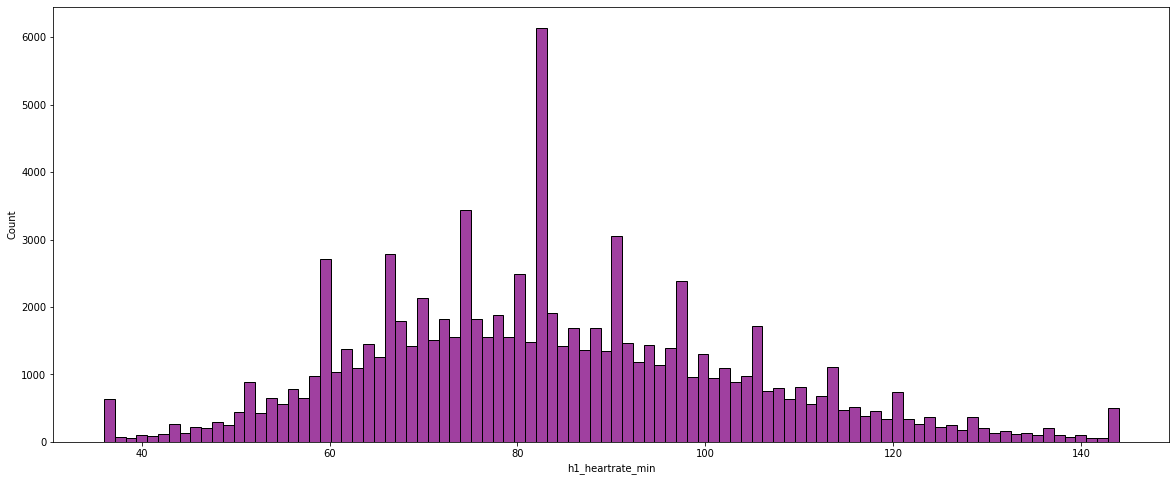

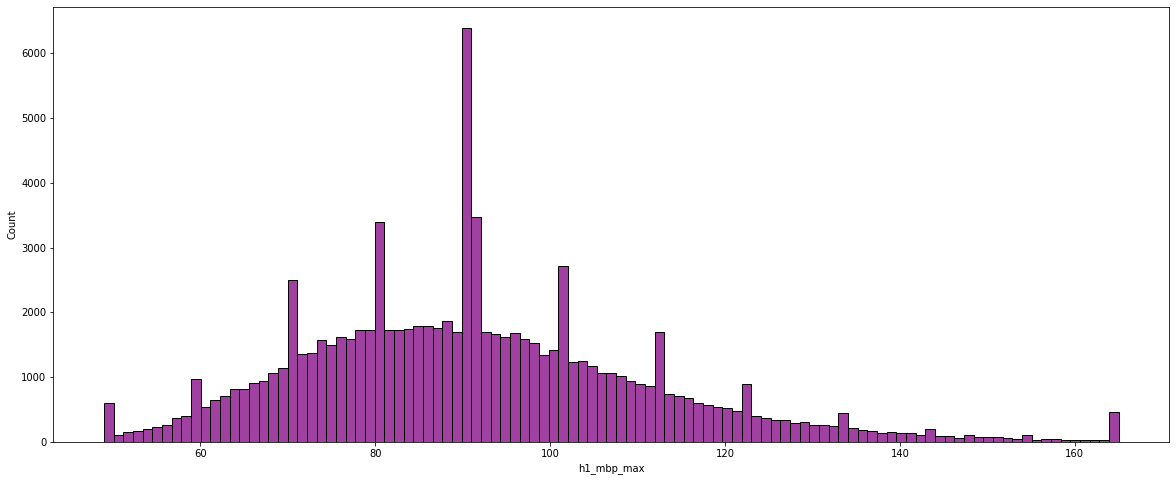

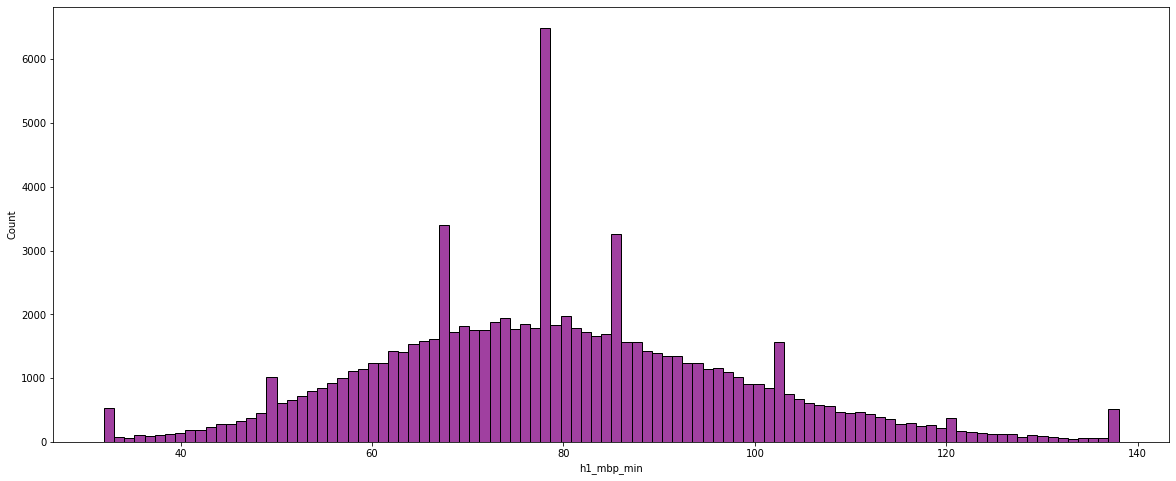

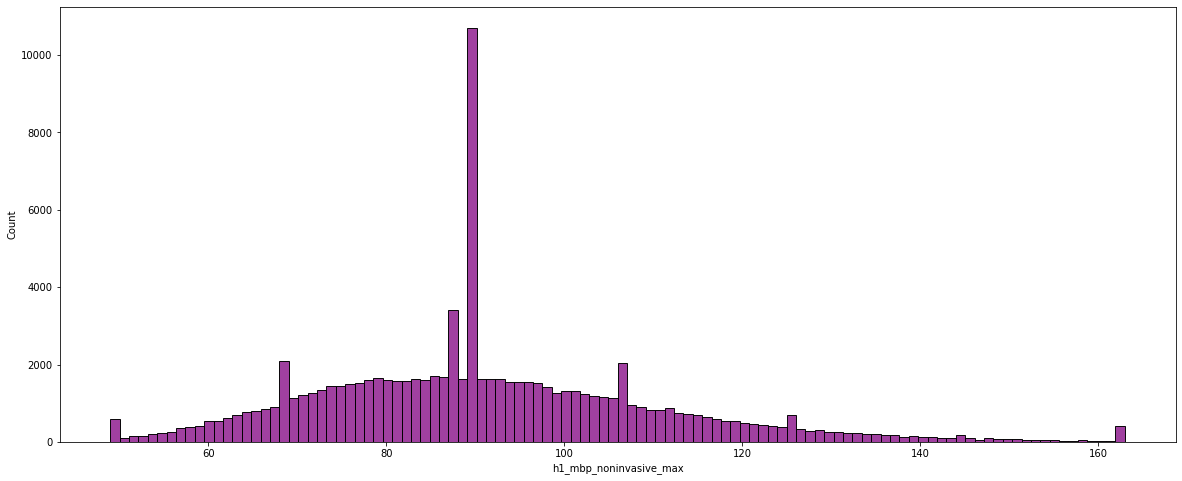

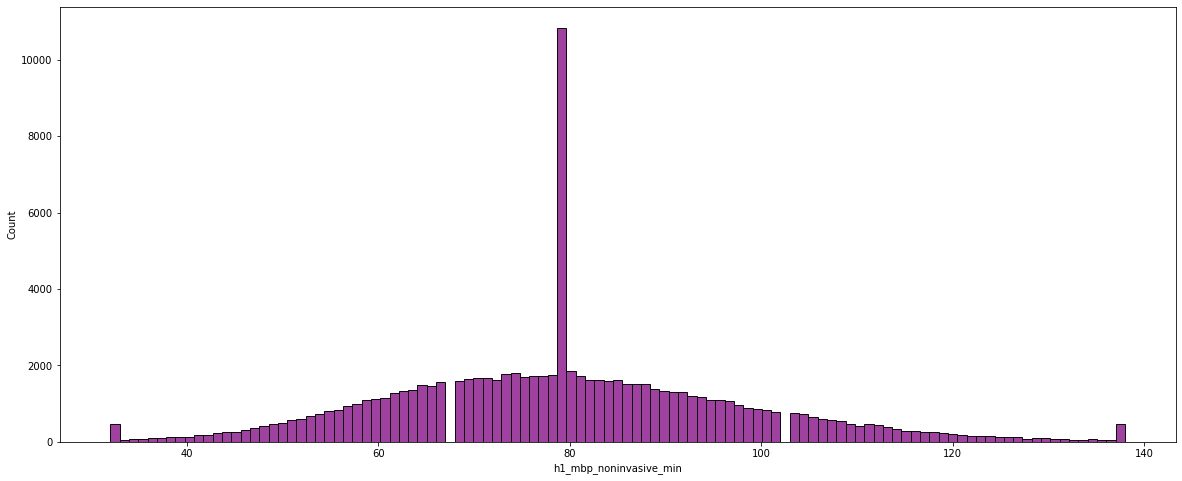

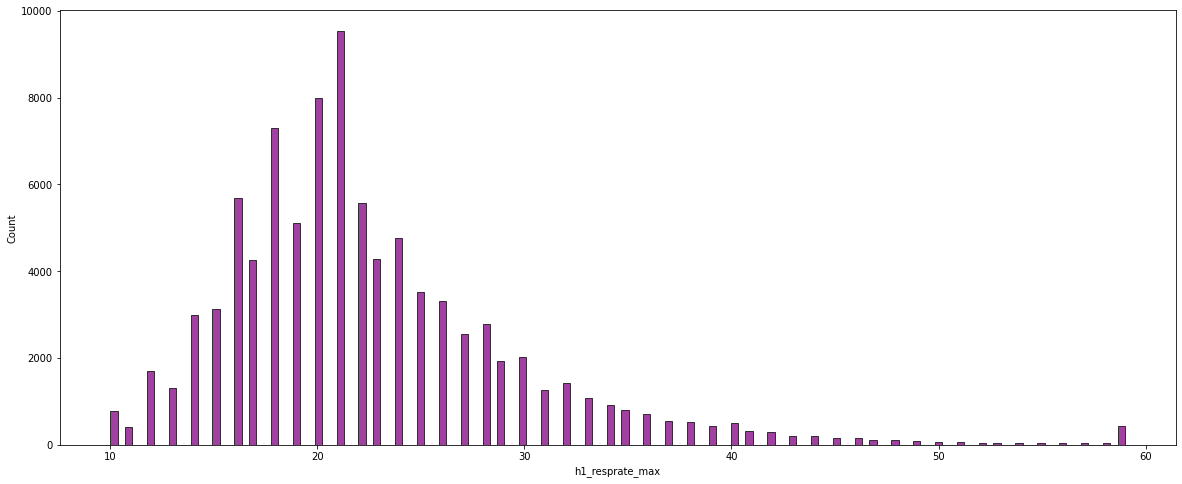

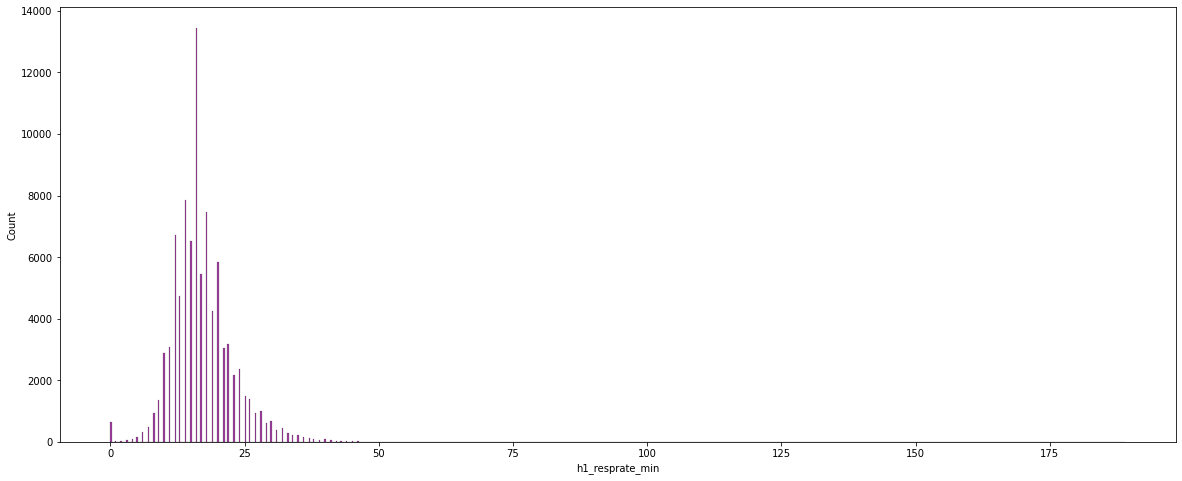

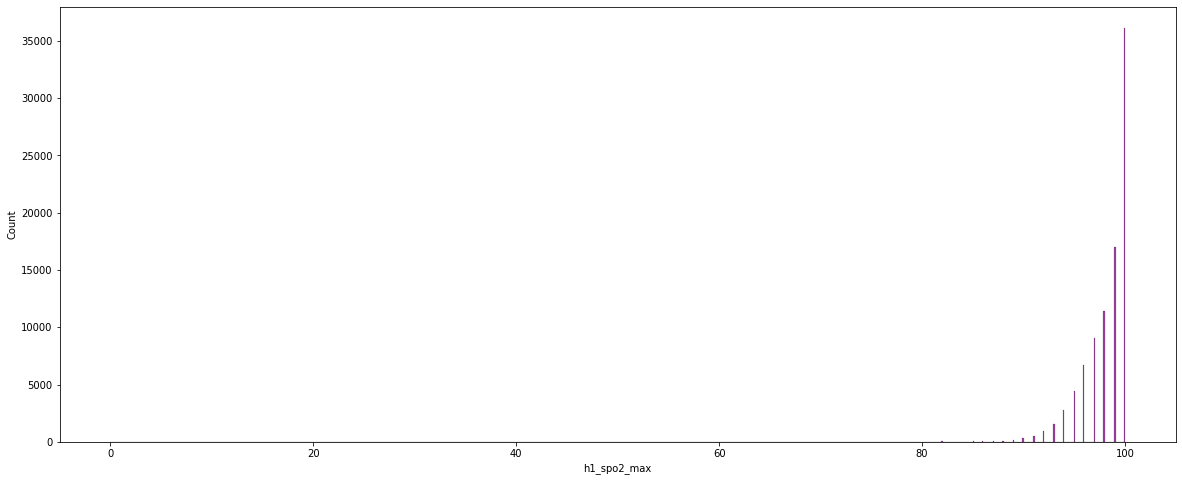

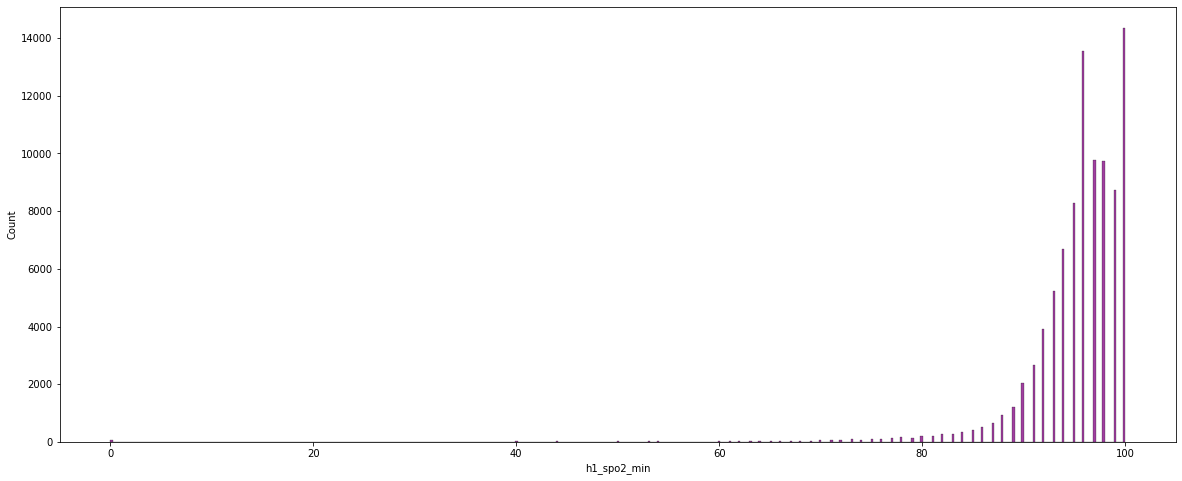

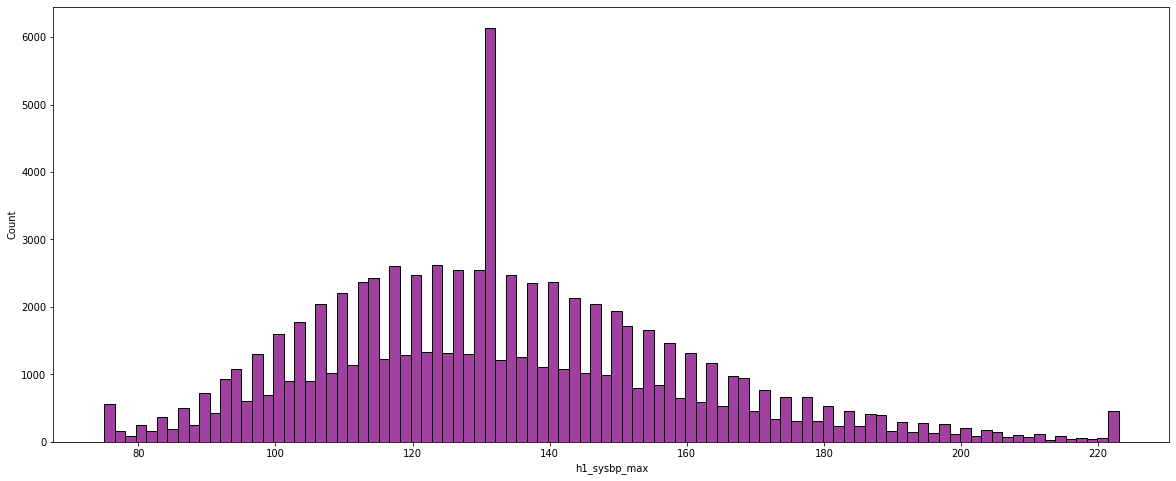

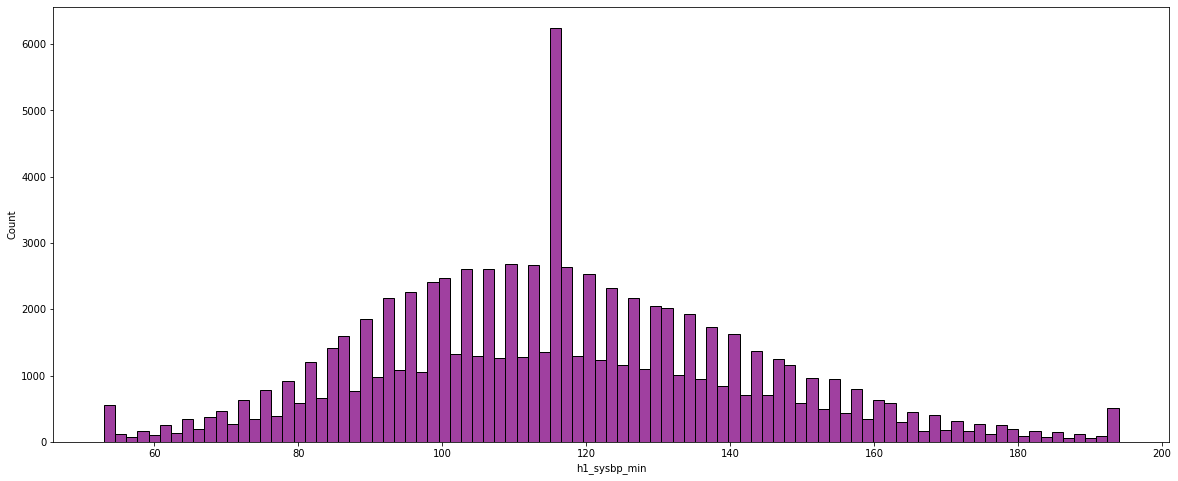

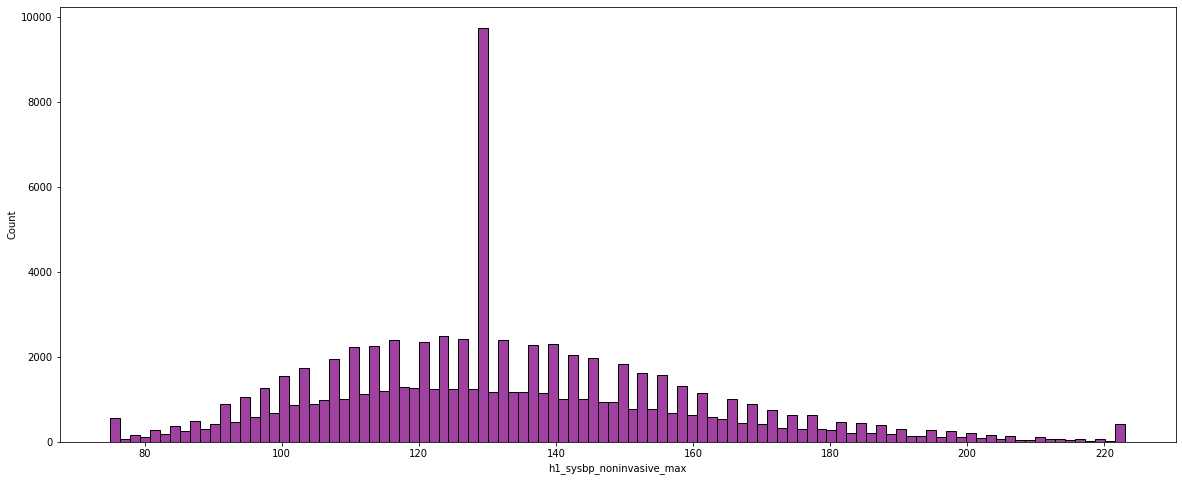

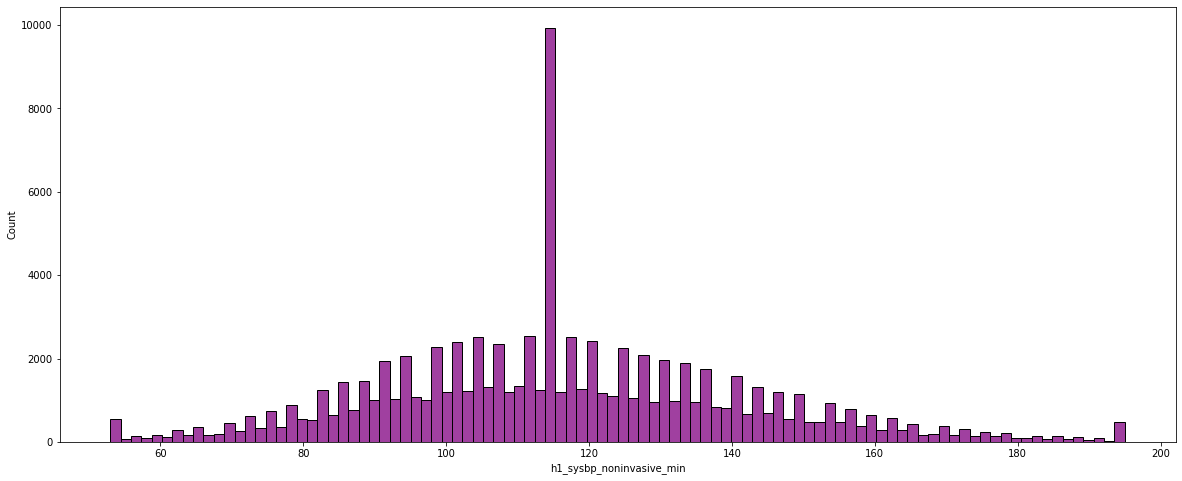

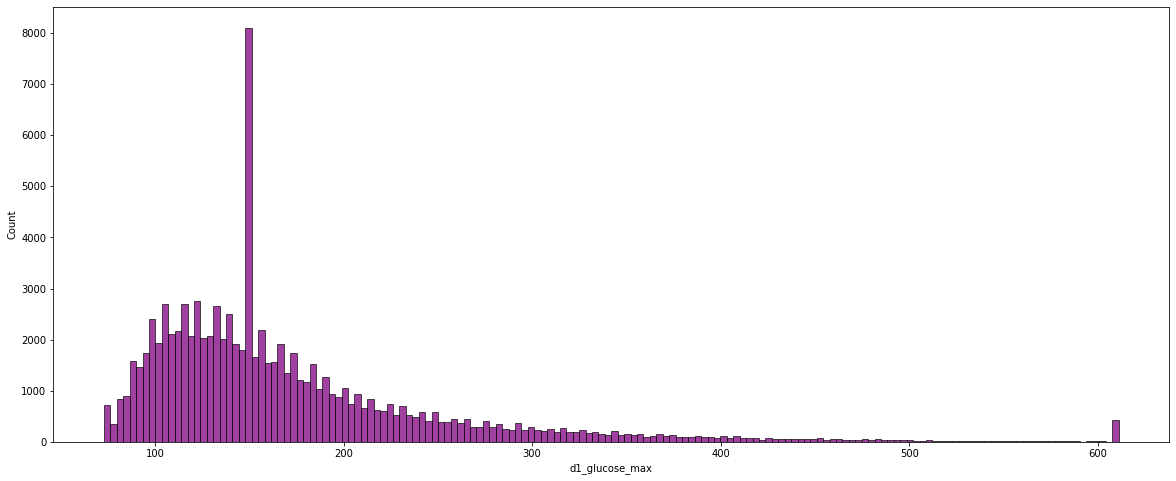

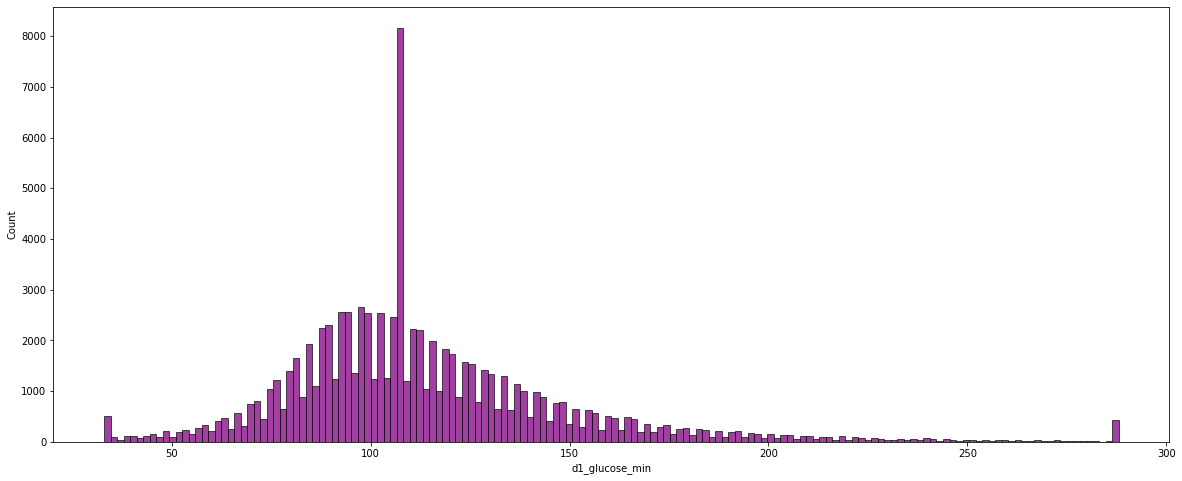

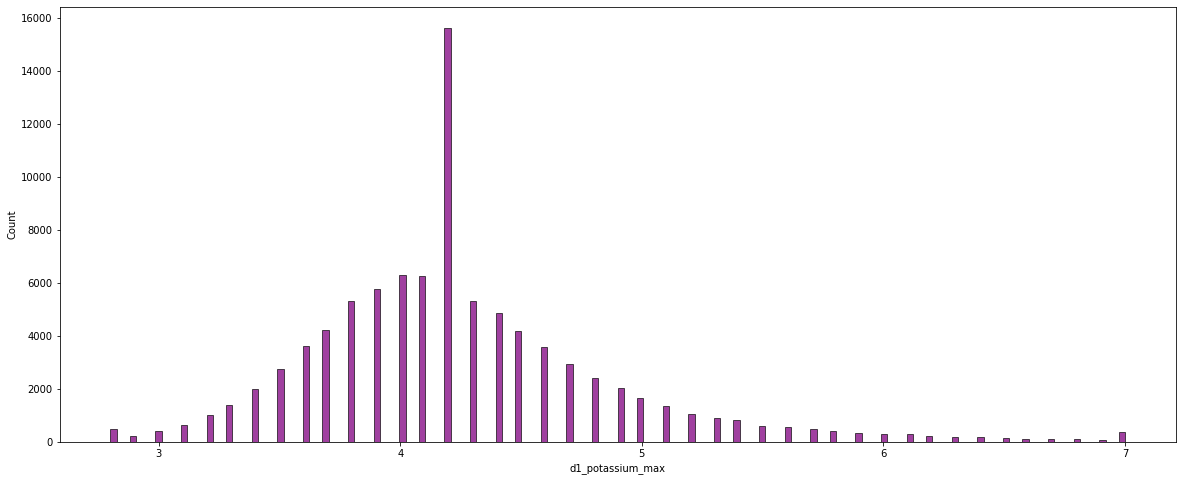

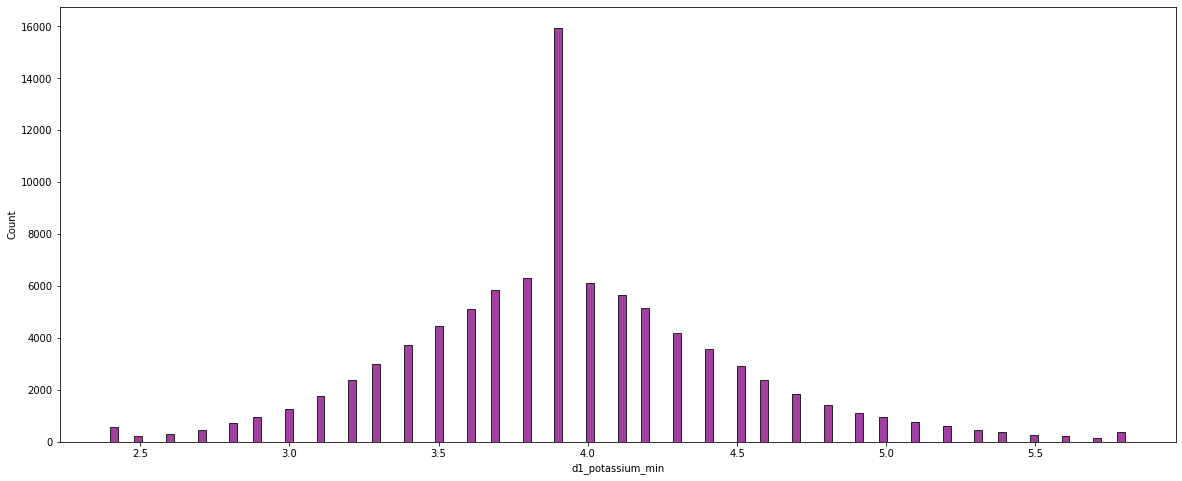

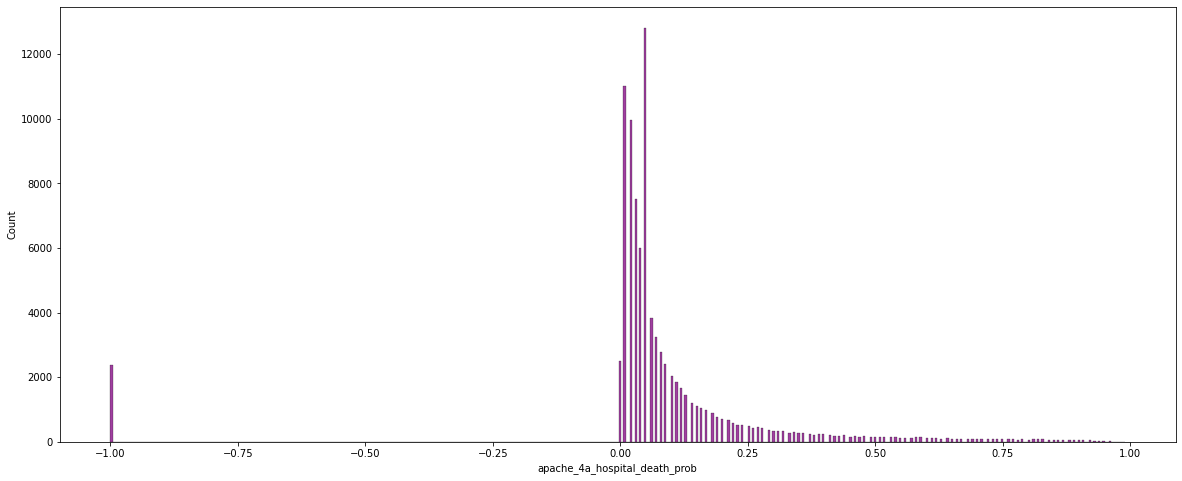

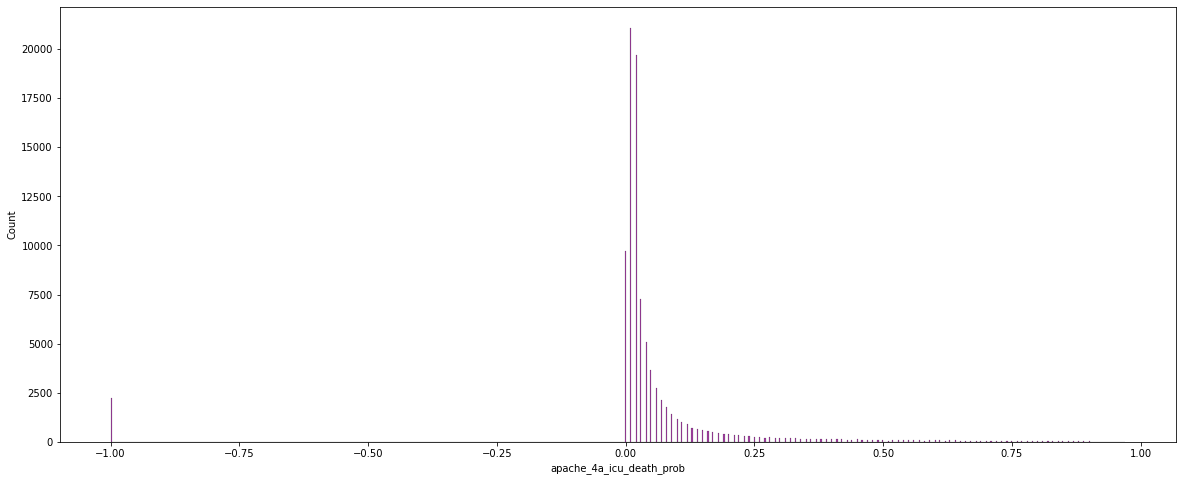

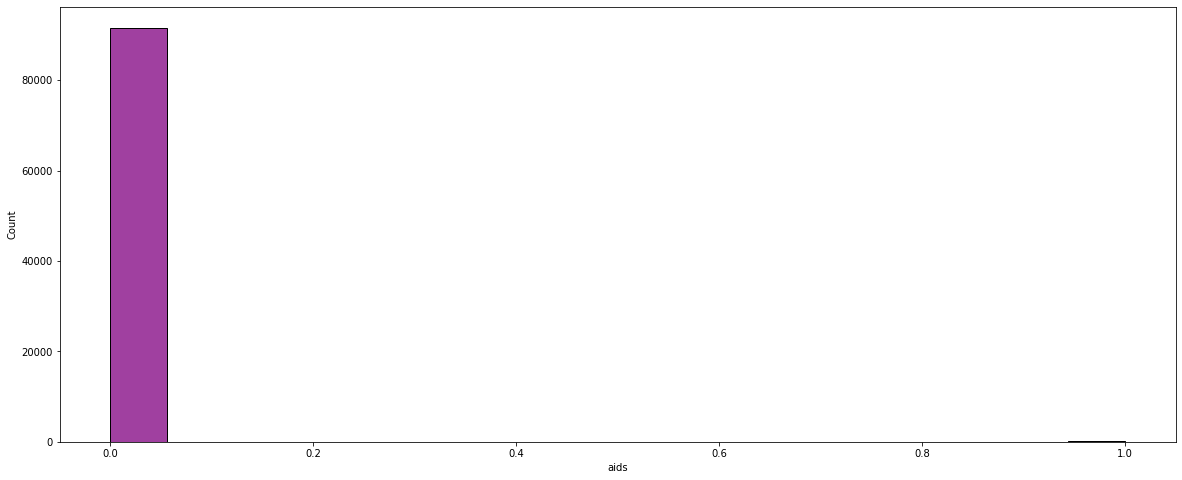

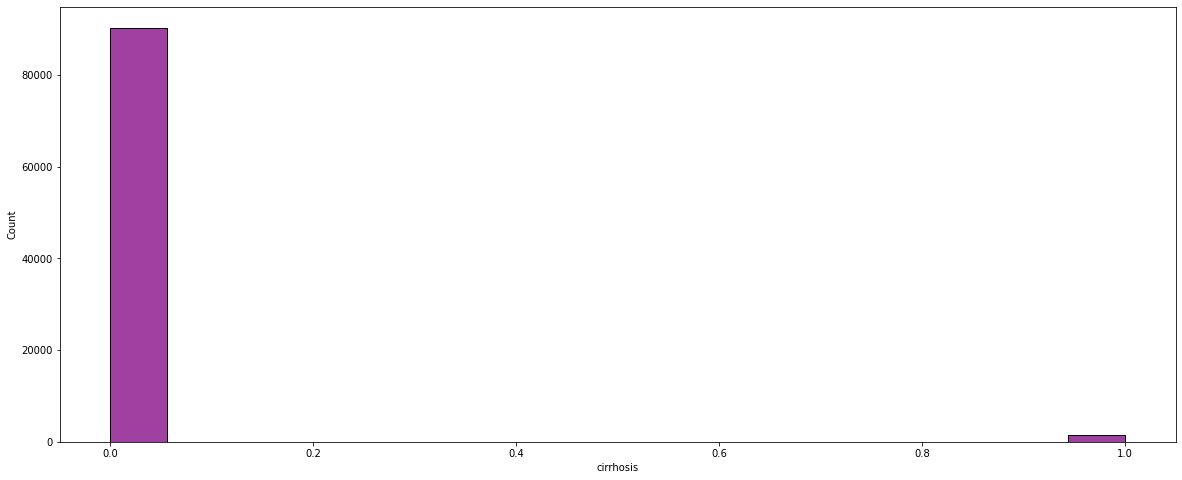

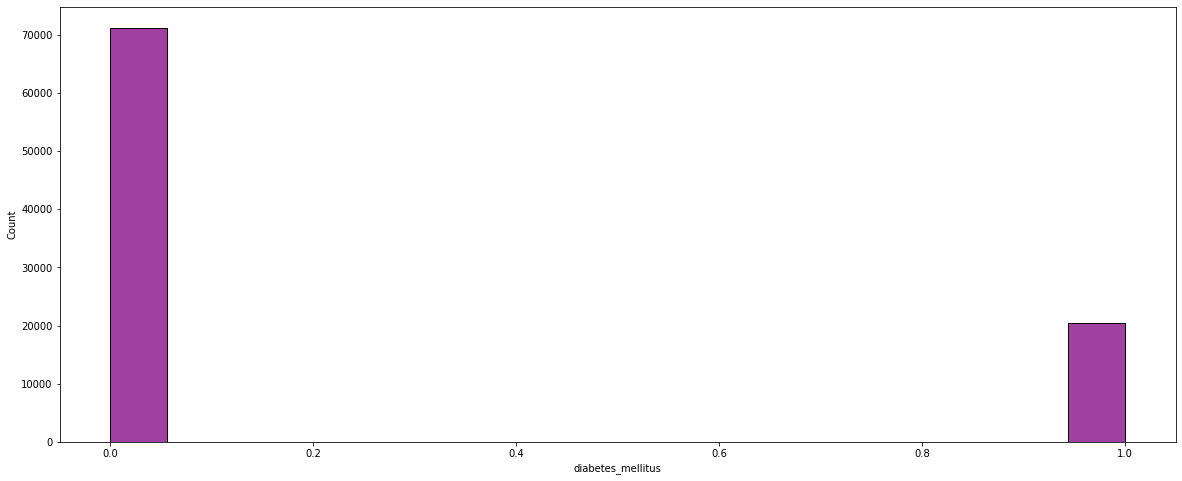

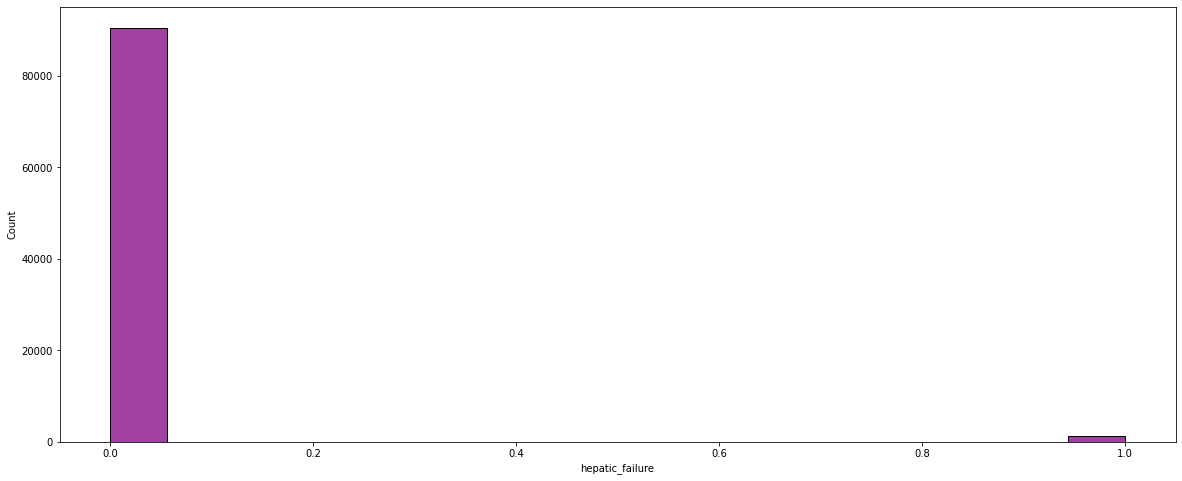

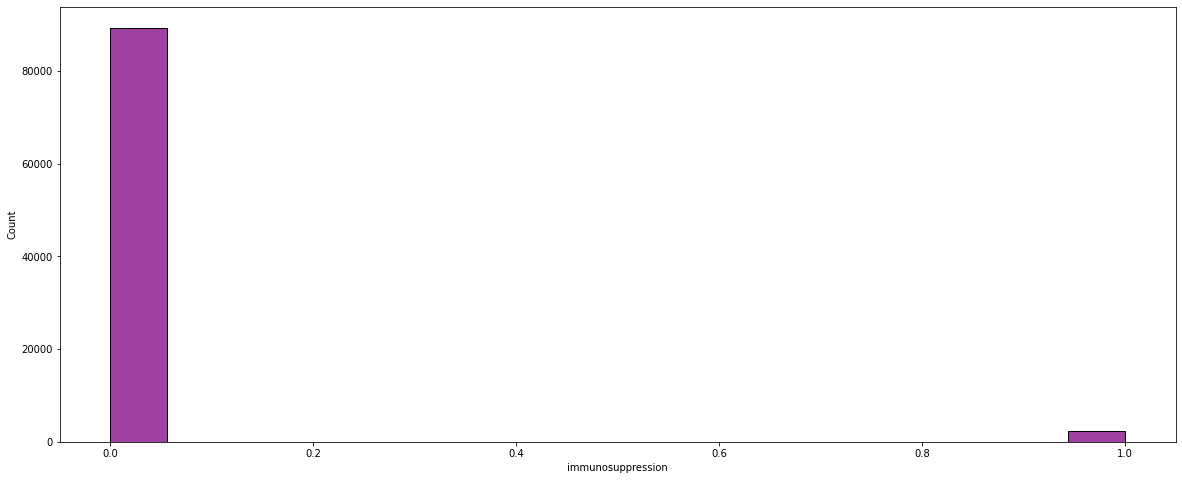

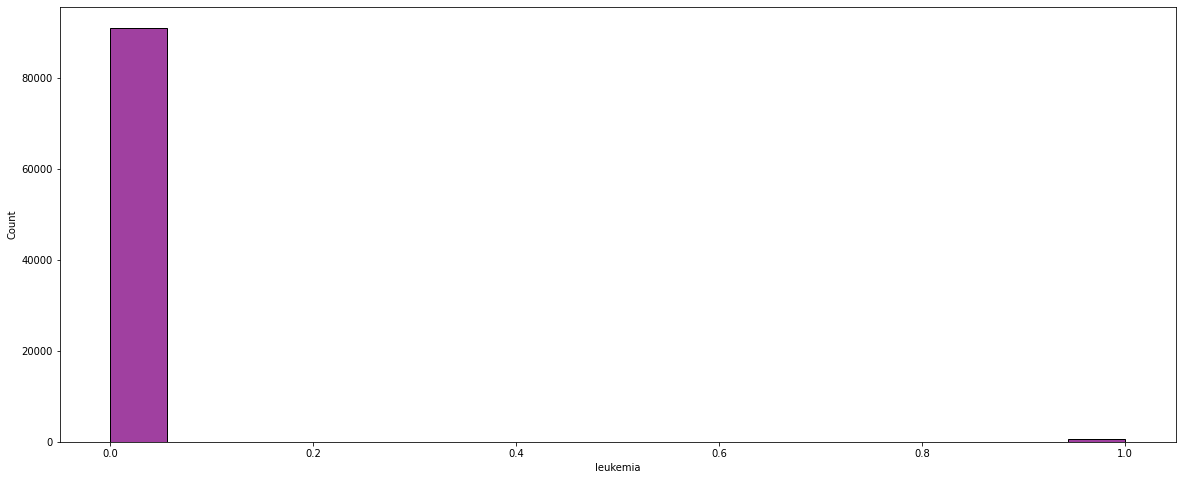

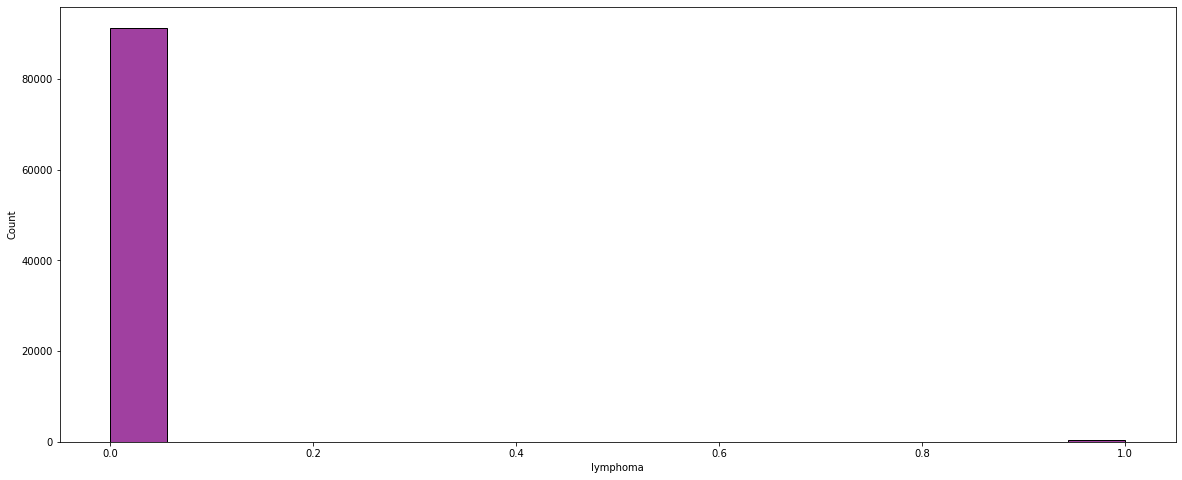

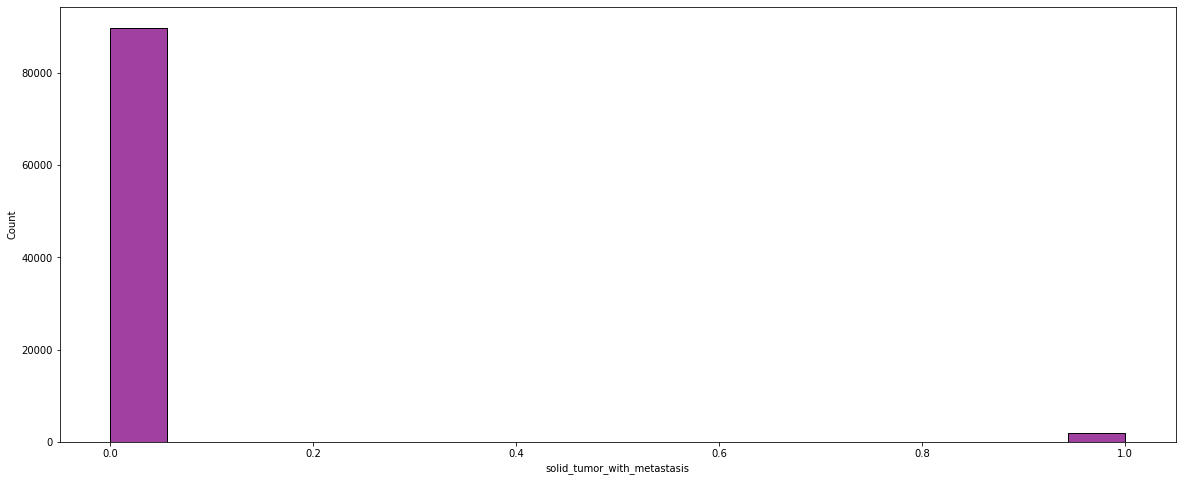

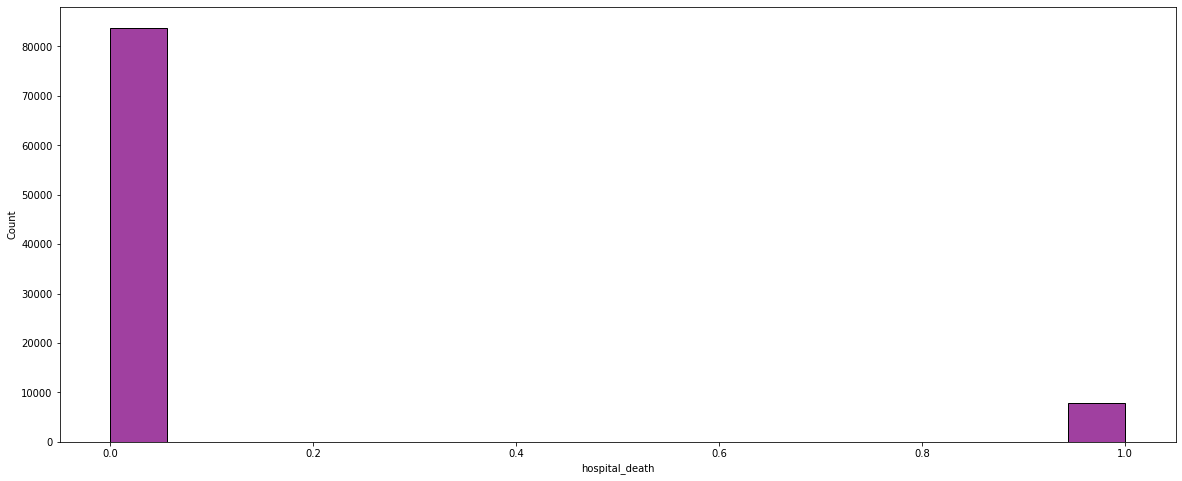

In [18]:
for col in Num:
    plt.figure(figsize=(20,8))
    sns.histplot(data[col], color="purple")
    plt.show()


for col in categorical:
    plt.figure(figsize=(20,8))
    sns.countplot(x=data[col])
    plt.show()

# PCA: Principal Component Analysis

1. > Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

1. > PCA is effected by scale so you need to scale the features in your data before applying PCA. Use RobustScaler to help you standardize the dataset’s features

In [17]:
from category_encoders import CountEncoder
CE = CountEncoder(normalize=True, cols=categorical)
data = CE.fit_transform(data)

In [18]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
scale = RS.fit_transform(data)
data = pd.DataFrame(scale, columns=data.columns)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
pca_data = pca.transform(data)

In [20]:
component_names = [f"Component {i}" for i in range(1,82 )]
component_names

['Component 1',
 'Component 2',
 'Component 3',
 'Component 4',
 'Component 5',
 'Component 6',
 'Component 7',
 'Component 8',
 'Component 9',
 'Component 10',
 'Component 11',
 'Component 12',
 'Component 13',
 'Component 14',
 'Component 15',
 'Component 16',
 'Component 17',
 'Component 18',
 'Component 19',
 'Component 20',
 'Component 21',
 'Component 22',
 'Component 23',
 'Component 24',
 'Component 25',
 'Component 26',
 'Component 27',
 'Component 28',
 'Component 29',
 'Component 30',
 'Component 31',
 'Component 32',
 'Component 33',
 'Component 34',
 'Component 35',
 'Component 36',
 'Component 37',
 'Component 38',
 'Component 39',
 'Component 40',
 'Component 41',
 'Component 42',
 'Component 43',
 'Component 44',
 'Component 45',
 'Component 46',
 'Component 47',
 'Component 48',
 'Component 49',
 'Component 50',
 'Component 51',
 'Component 52',
 'Component 53',
 'Component 54',
 'Component 55',
 'Component 56',
 'Component 57',
 'Component 58',
 'Component 59',
 'Comp

In [21]:
pca_data = pd.DataFrame(pca_data, columns=component_names)
pca_data

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 72,Component 73,Component 74,Component 75,Component 76,Component 77,Component 78,Component 79,Component 80,Component 81
0,-0.591851,-0.233714,-1.970390,5.610602,1.281296,-4.369519,-0.848433,2.192884,-2.583312,0.075911,...,-0.001195,-0.001406,0.006769,-0.001022,0.002284,-0.006569,-0.000062,0.000918,-0.001136,-0.002033
1,0.964135,-8.240436,-3.190243,-1.651509,6.046606,-1.706306,0.759250,-0.433347,-1.249059,1.061164,...,-0.003119,0.005002,-0.041831,0.007458,-0.005134,-0.003296,-0.009499,0.001746,-0.000895,0.000939
2,-2.389753,1.344030,0.515213,1.170001,0.249346,0.652197,0.096352,0.791148,0.106768,-0.147531,...,0.014014,-0.011371,0.096147,-0.001329,0.006188,-0.000298,-0.001887,-0.001623,-0.000098,-0.000792
3,-2.135152,-0.064971,-1.945987,-3.567793,-0.729382,1.951773,-0.337830,-1.640802,-1.186542,-1.065180,...,-0.003000,0.034834,0.013918,0.044891,0.007963,-0.000555,-0.095720,-0.036126,-0.009027,-0.000063
4,-2.249274,1.214045,2.229678,0.031392,-2.263215,0.532031,-0.566354,0.450601,-0.763462,-0.099778,...,-0.004045,-0.013878,-0.000331,-0.011157,-0.002962,0.000125,-0.003182,-0.010812,0.001450,-0.004655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,-1.250373,-0.690679,-3.603738,1.171394,0.316476,-1.260312,-1.695032,-0.701797,1.058238,-1.709847,...,0.020494,-0.002542,0.038593,0.005909,0.002558,0.005262,0.006654,0.004065,0.001530,0.000718
91709,-1.786235,0.102341,-3.217629,2.406090,4.018202,-1.361681,-2.332390,1.433034,-2.420551,-2.277484,...,0.007876,-0.003925,0.036341,0.001181,-0.001010,-0.007098,0.010050,-0.000910,-0.000656,0.001361
91710,-2.054033,-0.217353,-1.943805,-0.920039,1.625111,-0.227719,0.224155,-1.794105,-0.553932,-2.268276,...,0.008983,-0.021744,0.051068,-0.017005,0.002455,-0.005389,0.011502,0.005039,-0.002575,0.001623
91711,-2.079259,0.173158,-0.618259,-0.557949,0.855757,0.372386,-0.669021,1.208221,0.252091,1.473766,...,-0.007944,-0.021443,-0.103921,-0.012671,0.003424,-0.000970,-0.002475,0.009480,0.002216,-0.000006


# Explained Variance
1. > The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_,

In [22]:
pca.explained_variance_ratio_

array([3.70082580e-01, 1.93955353e-01, 6.86845187e-02, 3.88458762e-02,
       3.67482443e-02, 3.35128937e-02, 2.58333260e-02, 2.19772999e-02,
       1.66314836e-02, 1.57395381e-02, 1.43023043e-02, 1.18233313e-02,
       1.12122775e-02, 1.04252397e-02, 9.74166107e-03, 9.03875909e-03,
       8.36578601e-03, 7.81406628e-03, 6.49535207e-03, 6.26307500e-03,
       6.04130907e-03, 5.73716280e-03, 5.14469514e-03, 4.82731963e-03,
       4.61112340e-03, 4.16057820e-03, 4.04277968e-03, 3.93304854e-03,
       3.43668235e-03, 2.86205366e-03, 2.64301078e-03, 2.40980280e-03,
       2.23678017e-03, 2.12336515e-03, 2.08023508e-03, 2.00210028e-03,
       1.91481011e-03, 1.70278654e-03, 1.65192040e-03, 1.59359108e-03,
       1.57103600e-03, 1.37765539e-03, 1.33306507e-03, 1.28426954e-03,
       1.19244846e-03, 1.09670177e-03, 9.71452067e-04, 9.15676078e-04,
       7.47062829e-04, 7.19894963e-04, 6.75094742e-04, 5.69416130e-04,
       5.57159538e-04, 5.01203582e-04, 4.80668673e-04, 4.38039213e-04,
      

<AxesSubplot:>

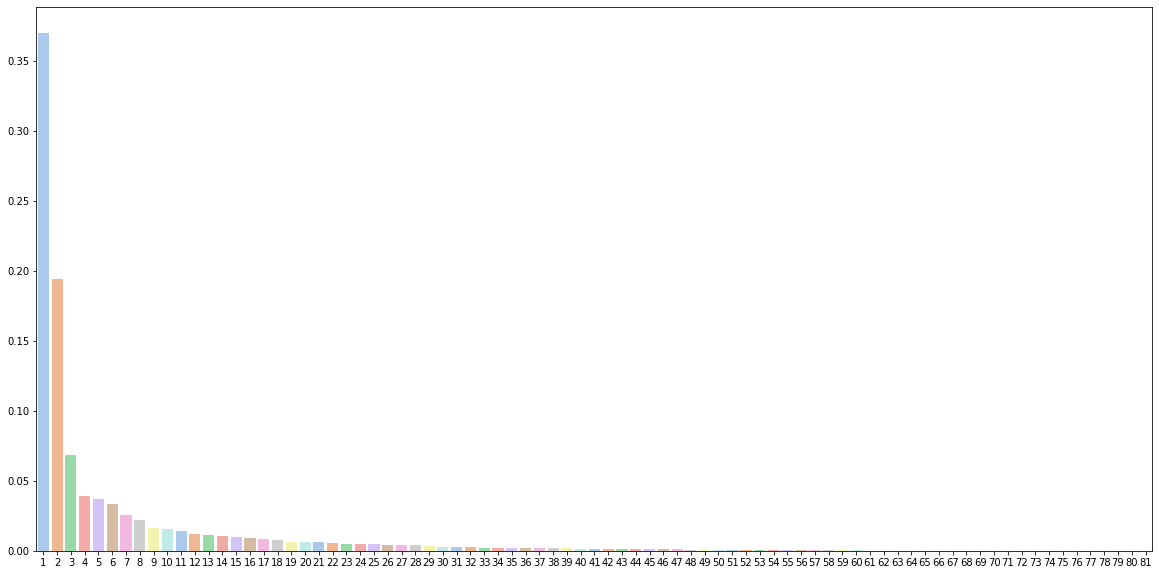

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x=list(range(1, 82)), y=pca.explained_variance_ratio_, palette="pastel")


In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [26]:
x_train.shape

(73370, 81)

In [1]:
class PrintDot(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs):
        
        if epoch % 50 == 0: 
            print(' ')
        print('.', end='')

NameError: name 'keras' is not defined

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(input_shape=(81,), units=1, activation='sigmoid'),
    keras.layers.Dense(264, activation=tf.nn.tanh),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
    ])

In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, callbacks=[earlyStopping, PrintDot()])

In [ ]:
model.evaluate(x_test, y_test)